[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/MeyerBender/data_analysis_workshop/blob/main/notebooks/02_exploratory_data_analysis_solution.ipynb)

# Exploratory Data Analysis

In this notebook, we will go over how to approach a dataset. The concepts you learn here are applicable to all kinds of tabular data. The basic workflow is as follows:

1. Read, clean and preprocess the data.
2. Perform some basic statistical analysis, e. g. looking at the mean, median and standard deviation of a variable.
3. Visualization and data exploration.

The data set we will be looking at contains information about breast cancer patients. Features describe the shape of the lobe in each patient. More information can be found at [Kaggle](https://www.kaggle.com/datasets/yasserh/breast-cancer-dataset?resource=download). Note that the original data set was slightly altered to illustrate certain concepts of data cleaning.

In [ ]:
# download the data
# if you have already run this cell once, there is no need to run it again
! wget https://www.huber.embl.de/users/matthias/breast-cancer-modified.csv /content/breast-cancer-modified.csv
data_dir = '/content/data'

# Setup
Here, we quickly import all of the required packages, so that we can use their methods later. Importing using short aliases (e. g. `import numpy as np`) is common practice, since it saves us some typing down the line.

In [1]:
import os
# numpy contains methods for basic array manipulations
import numpy as np
# pandas provides data frames, which are very useful when dealing with tabular data
import pandas as pd
# these two libraries are for plotting
import matplotlib.pyplot as plt
import seaborn as sns

# Data Reading, Cleaning and Preprocessing

First, we need to read in the data. For this, we can use the function `pd.read_csv()`. We store the result in a variable we call df (for data frame).

In [2]:
# reading in the data from a csv file
# use the first column as index (set index_col=0)
df = pd.read_csv(os.path.join(data_dir, 'breast-cancer-modified.csv'), index_col=0)
# printing the shape and first couple of rows of the data frame
print(df.shape)
# note that you can leave out the print() if you are in the last column 
# of a cell in a jupyter notebook
df.head()

(572, 32)


diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
id                                                                         
842302           M        17.99         10.38          122.80     1001.0   
842517           M        20.57         17.77          132.90     1326.0   
84300903         M        19.69         21.25          130.00     1203.0   
84348301         M        11.42         20.38           77.58      386.1   
84358402         M        20.29         14.34          135.10     1297.0   

          smoothness_mean  compactness_mean  concavity_mean  \
id                                                            
842302            0.11840           0.27760          0.3001   
842517            0.08474           0.07864          0.0869   
84300903          0.10960           0.15990          0.1974   
84348301          0.14250           0.28390          0.2414   
84358402          0.10030           0.13280        198.0000   

          concave points_mean  symmetry_mean  ...  texture_worst  \
id                                            ...                  
842302                0.14710         0.2419  ...          17.33   
842517                0.07017         0.1812  ...          23.41   
84300903              0.12790         0.2069  ...          25.53   
84348301              0.10520         0.2597  ...          26.50   
84358402              0.10430         0.1809  ...          16.67   

          perimeter_worst  area_worst  smoothness_worst  compactness_worst  \
id                                                                           
842302             184.60      2019.0            0.1622             0.6656   
842517             158.80      1956.0            0.1238             0.1866   
84300903           152.50      1709.0            0.1444             0.4245   
84348301            98.87       567.7            0.2098             0.8663   
84358402           152.20      1575.0            0.1374           205.0000   

          concavity_worst  concave points_worst  symmetry_worst  \
id                                                                
842302             0.7119                0.2654          0.4601   
842517             0.2416              186.0000        275.0000   
84300903           0.4504              243.0000          0.3613   
84348301           0.6869                0.2575          0.6638   
84358402           0.4000                0.1625          0.2364   

          fractal_dimension_worst  num_days_since_biopsy  
id                                                        
842302                    0.11890                  100.0  
842517                    0.08902                  142.0  
84300903                  0.08758                    NaN  
84348301                173.00000                  151.0  
84358402                  0.07678                  123.0  

[5 rows x 32 columns]

Next, we want to see how good our data is. Two common issues are missing data and duplicates (e. g. if two doctors entered information about a patient simultaneously). Check if there are any in this dataset.

In [3]:
# checking for duplicate rows
# hint: after getting duplicated values, the np.any() method might help
np.any(df.duplicated())

True

In [4]:
# removing duplicate rows
df = df.drop_duplicates()

In [5]:
# checking the shape of the data frame again. What changed?
df.shape

(569, 32)

In [6]:
# checking for missing values
df.isnull().values.any()

True

In [7]:
# removing columns (not rows) that contain missing values
df = df.dropna(axis=1)
# checking the shape of the data frame
df.shape

(569, 31)

Here, we simply chose to remove all rows that contained NA values. You could also consider removing the features (column) that contains NAs, or try to interpolate the missing values from other variables.

# Statistical Analysis
Now that our data is nice and cleaned up, we can start looking at what we have. Common things to look at for numerical data are mean, median, and standard deviation. When looking at categorical data, you could look at the unique values and how many of each there are.

In [8]:
# start by looking at the features we have
df.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [9]:
# choose a numerical feature of interest
# compute the mean, median and standard deviation using numpy or pandas
mean = df["radius_mean"].mean()
median = df["radius_mean"].median()
stdev = df["radius_mean"].std()

print(f"Mean: {mean}, Median: {median}, Standard deviation: {stdev}")

Mean: 14.127291739894552, Median: 13.37, Standard deviation: 3.524048826212078


In [10]:
# check if there are any categorical variables in the data
# if so, check which values are present, and count how many of each value there are
print(df["diagnosis"].unique())
print(df["diagnosis"].value_counts())

['M' 'B']
B    357
M    212
Name: diagnosis, dtype: int64


In [11]:
# cool, now we can already investigate individual features
# but is there a pandas method that can compute a bunch of statistics at once?
# see if you can find it
df.describe()

radius_mean  texture_mean  perimeter_mean    area_mean  \
count   569.000000    569.000000      569.000000   569.000000   
mean     14.127292     19.289649       91.969033   654.889104   
std       3.524049      4.301036       24.298981   351.914129   
min       6.981000      9.710000       43.790000   143.500000   
25%      11.700000     16.170000       75.170000   420.300000   
50%      13.370000     18.840000       86.240000   551.100000   
75%      15.780000     21.800000      104.100000   782.700000   
max      28.110000     39.280000      188.500000  2501.000000   

       smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
count       569.000000        569.000000      569.000000           569.000000   
mean          4.304801          4.835984        7.489124             2.366459   
std          21.074558         26.827478       35.618994            16.155145   
min           0.052630          0.019380        0.000000             0.000000   
25%           0.086410          0.065260        0.029580             0.020310   
50%           0.095940          0.094620        0.063870             0.033900   
75%           0.106100          0.132500        0.142500             0.077260   
max         123.000000        277.000000      313.000000           162.000000   

       symmetry_mean  fractal_dimension_mean  ...  radius_worst  \
count     569.000000              569.000000  ...    569.000000   
mean       16.965766                0.851112  ...     16.269190   
std        53.846023                7.103493  ...      4.833242   
min         0.116700                0.049960  ...      7.930000   
25%         0.163400                0.057800  ...     13.010000   
50%         0.181400                0.061660  ...     14.970000   
75%         0.203600                0.066400  ...     18.790000   
max       304.000000               78.000000  ...     36.040000   

       texture_worst  perimeter_worst   area_worst  smoothness_worst  \
count     569.000000       569.000000   569.000000        569.000000   
mean       25.677223       107.261213   880.583128         10.633281   
std         6.146258        33.602542   569.356993         37.236433   
min        12.020000        50.410000   185.200000          0.071170   
25%        21.080000        84.110000   515.300000          0.117800   
50%        25.410000        97.660000   686.500000          0.133800   
75%        29.720000       125.400000  1084.000000          0.150000   
max        49.540000       251.200000  4254.000000        185.000000   

       compactness_worst  concavity_worst  concave points_worst  \
count         569.000000       569.000000            569.000000   
mean           23.401569        22.585529              8.745685   
std            86.179359        91.310437             39.465975   
min             0.027290         0.000000              0.000000   
25%             0.150700         0.116800              0.064990   
50%             0.227900         0.249200              0.101500   
75%             0.384200         0.431600              0.170800   
max           709.000000       681.000000            291.000000   

       symmetry_worst  fractal_dimension_worst  
count      569.000000               569.000000  
mean        30.367174                 1.964313  
std         90.748044                14.464355  
min          0.156500                 0.055040  
25%          0.254900                 0.071460  
50%          0.288400                 0.080060  
75%          0.331800                 0.092110  
max        544.000000               173.000000  

[8 rows x 30 columns]

# Basic Visualization

Looking at numbers is cool and all, but it is hard to find any patterns in there. This is where visualization comes in. Here, we will look at a bunch of visualizations that help you to get a better feel for your data.

## Histograms

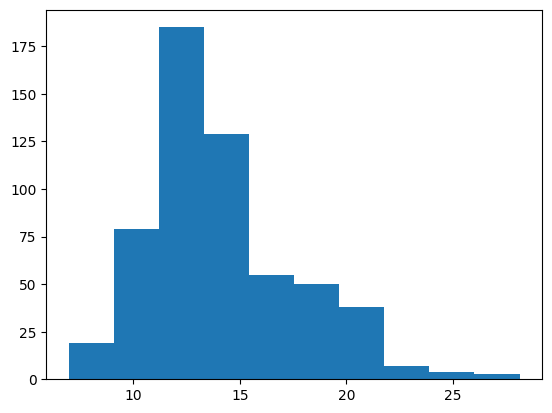

In [12]:
# while things like median and standard deviation give you a rough feel for the data,
# it is usually better to just look at the underlying distribution
# choose one of the numerical features and plot its distribution using pyplot 
# remember we imported this as plt
plt.hist(df["radius_mean"])
plt.show()

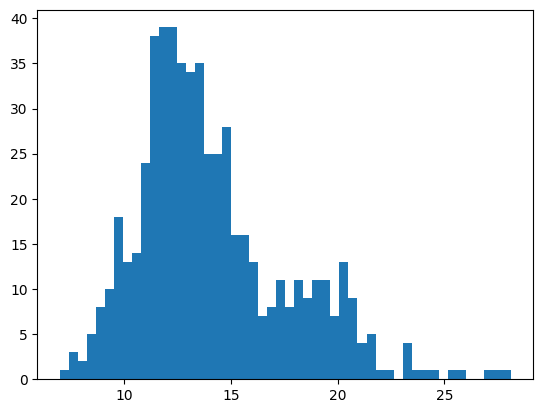

In [13]:
# what happens if you increase/decrease the number of bins in the histogram?
plt.hist(df["radius_mean"], bins=50)
plt.show()

## Scatter Plots
Looking at one feature is cool, but what is better than one? Exactly, two!
Use seaborn to create a scatter plot that plots one numerical feature against a different one. Color the points according to if the cancer is benign or malignant. 
Do you see any patterns?

<Axes: xlabel='radius_mean', ylabel='texture_mean'>

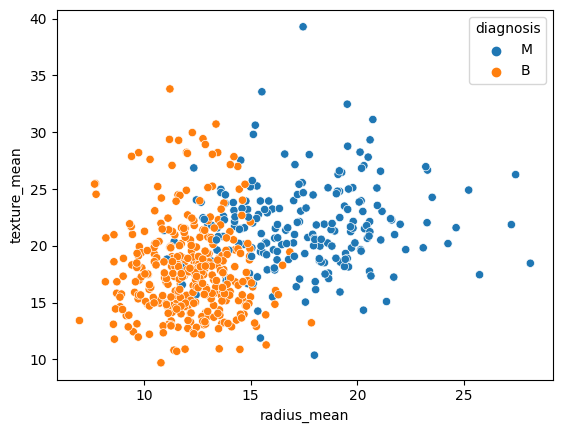

In [14]:
# HINT: in seaborn, you can set the color with hue="column_of_interest"
sns.scatterplot(df, x="radius_mean", y="texture_mean", hue="diagnosis")

## Correlations and Heatmaps

In real life datasets, features are often correlated with one another. We can compute pairwise correlations between features to assess if this is the case.

Compute the correlation between the two features you chose for the previous plot. Are they correlated with one another? How much?

In [15]:
# compute the correlation between the two features
# you can use numpy, pandas, or even try to import scipy to also obtain a p-value
print(np.corrcoef(df["radius_mean"], df["texture_mean"]))

from scipy.stats import pearsonr
pearsonr(df["radius_mean"], df["texture_mean"])

[[1.         0.32378189]
 [0.32378189 1.        ]]


(0.323781890927733, 2.360374375922593e-15)

Okay, so we know how to compute pairwise correlations. Can you do this for all possible combinations of features?

In [16]:
# compute the pairwise correlation matrix for all features in the data frame
# what happens to the diagnosis column?
pairwise_correlations = df.corr(numeric_only=True)
pairwise_correlations

radius_mean  texture_mean  perimeter_mean  area_mean  \
radius_mean                 1.000000      0.323782        0.997855   0.987357   
texture_mean                0.323782      1.000000        0.329533   0.321086   
perimeter_mean              0.997855      0.329533        1.000000   0.986507   
area_mean                   0.987357      0.321086        0.986507   1.000000   
smoothness_mean             0.098307      0.033670        0.105892   0.107286   
compactness_mean            0.090185      0.140073        0.098709   0.076765   
concavity_mean              0.149366      0.054148        0.155419   0.151664   
concave points_mean         0.209311      0.082132        0.215696   0.215024   
symmetry_mean              -0.099006     -0.032590       -0.097831  -0.096938   
fractal_dimension_mean     -0.026864     -0.094817       -0.024489  -0.028365   
radius_se                   0.022145      0.038599        0.026354   0.006286   
texture_se                 -0.012690     -0.103253       -0.013555  -0.022133   
perimeter_se               -0.018027     -0.039210       -0.021178  -0.016288   
area_se                     0.735864      0.259845        0.744983   0.800086   
smoothness_se              -0.222600      0.006614       -0.202694  -0.166777   
compactness_se              0.020823     -0.014323        0.018815   0.021899   
concavity_se               -0.013693     -0.036238       -0.008351  -0.003488   
concave points_se           0.032028     -0.022478        0.027014   0.022966   
symmetry_se                -0.053744     -0.009319       -0.051572  -0.049422   
fractal_dimension_se        0.015426      0.046058        0.020381   0.008905   
radius_worst                0.969539      0.352573        0.969476   0.962746   
texture_worst               0.297008      0.912045        0.303038   0.287489   
perimeter_worst             0.965137      0.358040        0.970387   0.959120   
area_worst                  0.941082      0.343546        0.941550   0.959213   
smoothness_worst           -0.003977     -0.005302        0.000419  -0.002280   
compactness_worst           0.028938      0.014454        0.033119   0.022187   
concavity_worst             0.109728      0.026785        0.113102   0.108169   
concave points_worst        0.181883      0.059725        0.185364   0.183860   
symmetry_worst              0.083933     -0.064752        0.086627   0.083427   
fractal_dimension_worst     0.015909      0.019585        0.027304   0.008054   

                         smoothness_mean  compactness_mean  concavity_mean  \
radius_mean                     0.098307          0.090185        0.149366   
texture_mean                    0.033670          0.140073        0.054148   
perimeter_mean                  0.105892          0.098709        0.155419   
area_mean                       0.107286          0.076765        0.151664   
smoothness_mean                 1.000000         -0.034976        0.014554   
compactness_mean               -0.034976          1.000000        0.103352   
concavity_mean                  0.014554          0.103352        1.000000   
concave points_mean             0.043158          0.178646        0.066535   
symmetry_mean                   0.001686          0.006421       -0.019557   
fractal_dimension_mean         -0.022084         -0.019556       -0.023116   
radius_se                       0.074028          0.079221       -0.043781   
texture_se                     -0.034106         -0.030095        0.013870   
perimeter_se                   -0.010743         -0.010652       -0.011968   
area_se                         0.110221          0.036463        0.088118   
smoothness_se                   0.064500         -0.024045        0.020008   
compactness_se                 -0.017808         -0.013915        0.075666   
concavity_se                   -0.012736         -0.010971       -0.012431   
concave points_se              -0.013558         -0.011872       -0.013255   
symmetry_se                    

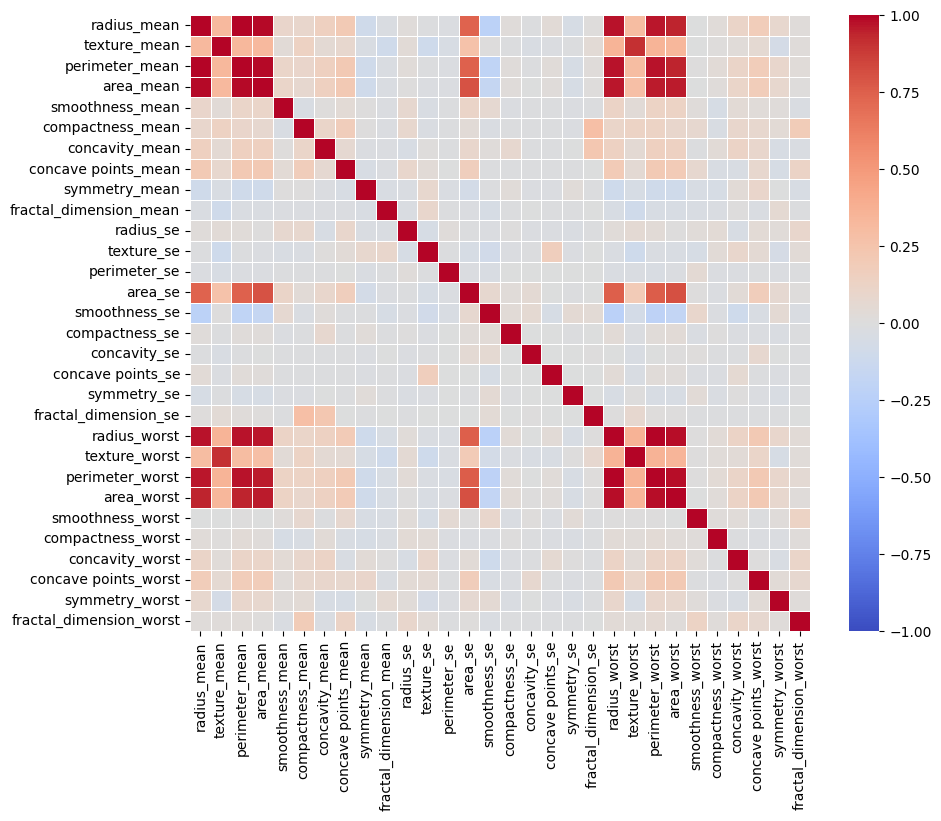

In [17]:
# plot the resulting correlation matrix as a heatmap using seaborn
# make sure that your color scale makes sense
plt.figure(figsize=(10, 8))
sns.heatmap(pairwise_correlations, cmap='coolwarm', fmt=".2f", linewidths=.5, vmin=-1, vmax=1)
plt.show()

# Visualization of High Dimensional Data

30 features are quite a lot, and our minds are certainly not wired for visualizing data points in 30-dimensional space. Instead, we need to come up with some workarounds. Here, we can look at how to use heatmaps to visualize such datasets. We will also play around with some dimensionality reduction methods to enable us to visualize our high-dimensional data in 2D space.

## Visualization with Heatmaps

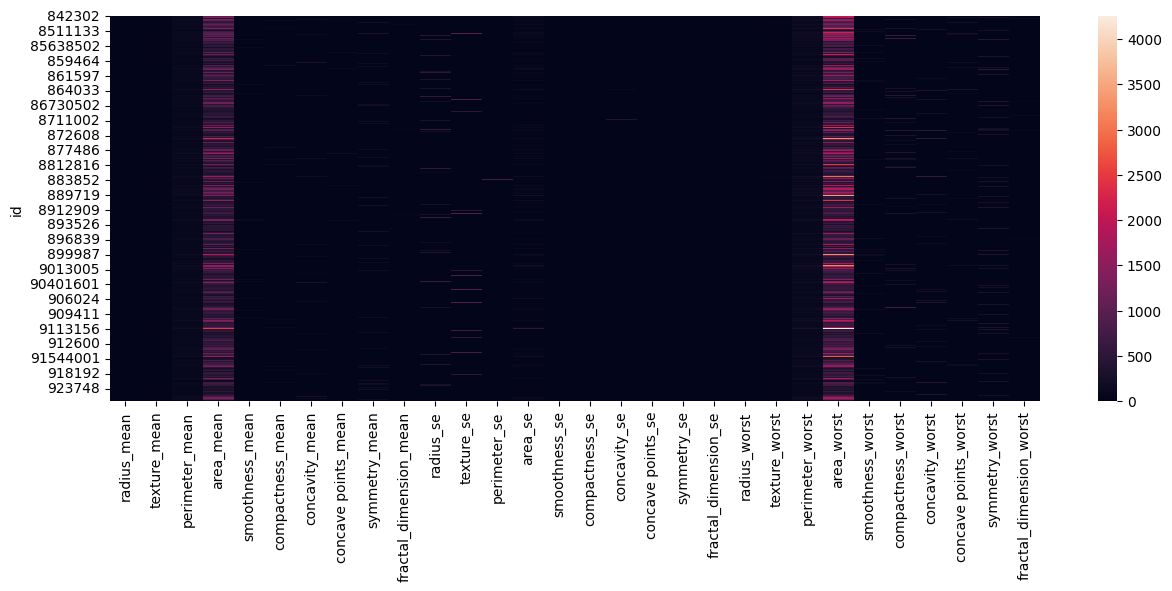

In [18]:
# create a heatmap showing all features for all patients
# you might need to subselect from the data frame so that you only use 
# numerical features in the heatmap
plt.figure(figsize=(15, 5))
sns.heatmap(df.iloc[:, 1:])
plt.show()

## Normalization and Standardization

I'm sure the previous heatmap looks awesome, but you might have spotted a small problem: the features are all in very different ranges. For example, the area of a lobe is obviously going to be substantially bigger than its radius.

To make it easier to see what is going on, we can try to scale our data. There are several ways we could do this. 

For example, we could try to scale every feature between 0 and 1. This is commonly referred to as **normalization**. 

Alternatively, you could alter the data so that the mean of each feature is at 0, and the standard deviation is one. This is called **standardization**.

You might already be familiar with standardization. When performing Principal Component Analysis (PCA), you first have to center and scale your data. That's basically what we do: we center the data (so that the mean is zero) and then scale it (so that each feature has a standard deviation of one).

In [19]:
# perform standardization on the data frame
# store the standardized data frame in a variable called df_standardized
# for standardization, you can use the StandardScaler from sklearn
# however, you will need to import it first
# HINT: you cannot standardize a categorical feature, so make sure to remove it before applying the StandardScaler
# you can add it back to the standardized data frame afterwards if you need it
from sklearn.preprocessing import StandardScaler

# importing the standard scaler
scaler = StandardScaler()
# performing standardization and putting the results into a data frame
df_standardized = pd.DataFrame(scaler.fit_transform(df.iloc[:, 1:]), 
                               columns=df.columns[1:], 
                               index=df.index)
# adding the diagnosis column back in
df_standardized["diagnosis"] = df["diagnosis"]
df_standardized.head()

radius_mean  texture_mean  perimeter_mean  area_mean  \
id                                                               
842302       1.097064     -2.073335        1.269934   0.984375   
842517       1.829821     -0.353632        1.685955   1.908708   
84300903     1.579888      0.456187        1.566503   1.558884   
84348301    -0.768909      0.253732       -0.592687  -0.764464   
84358402     1.750297     -1.151816        1.776573   1.826229   

          smoothness_mean  compactness_mean  concavity_mean  \
id                                                            
842302          -0.198822         -0.170064       -0.202009   
842517          -0.200421         -0.177487       -0.208000   
84300903        -0.199240         -0.174455       -0.204895   
84348301        -0.197677         -0.169829       -0.203658   
84358402        -0.199682         -0.175466        5.353282   

          concave points_mean  symmetry_mean  fractal_dimension_mean  ...  \
id                                                                    ...   
842302              -0.137499      -0.310860               -0.108831  ...   
842517              -0.142265      -0.311988               -0.111937  ...   
84300903            -0.138688      -0.311511               -0.111469  ...   
84348301            -0.140095      -0.310529               -0.106192  ...   
84358402            -0.140150      -0.311994               -0.111632  ...   

          texture_worst  perimeter_worst  area_worst  smoothness_worst  \
id                                                                       
842302        -1.359293         2.303601    2.001237         -0.281453   
842517        -0.369203         1.535126    1.890489         -0.282485   
84300903      -0.023974         1.347475    1.456285         -0.281931   
84348301       0.133984        -0.249939   -0.550021         -0.280173   
84358402      -1.466770         1.338539    1.220724         -0.282119   

          compactness_worst  concavity_worst  concave points_worst  \
id                                                                   
842302            -0.264054        -0.239763             -0.215065   
842517            -0.269617        -0.244918              4.495272   
84300903          -0.266854        -0.242630              5.940825   
84348301          -0.261723        -0.240037             -0.215265   
84358402           2.109069        -0.243182             -0.217675   

          symmetry_worst  fractal_dimension_worst  diagnosis  
id                                                            
842302         -0.329852                -0.127696          M  
842517          2.698109                -0.129763          M  
84300903       -0.330941                -0.129863          M  
84348301       -0.327605                11.835037          M  
84358402       -0.332319                -0.130610          M  

[5 rows x 31 columns]

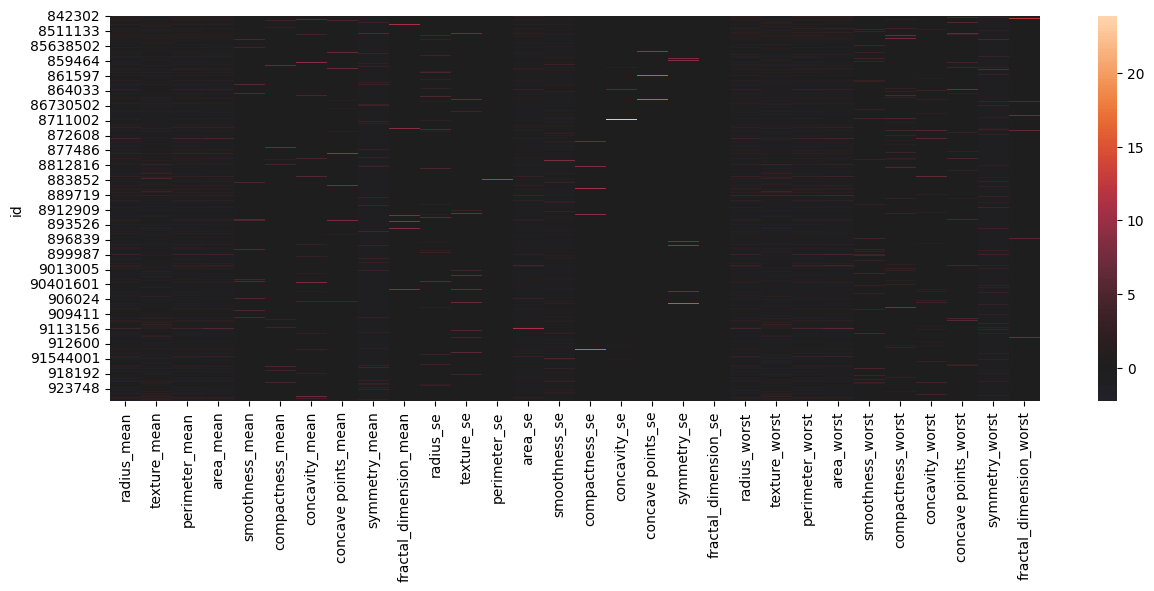

In [20]:
# now try creating the heatmap from before again. 
# do you see the difference?
# pro tip: always make sure that your color scale makes sense (e. g. 0 is at the center)
# you can use center=0 in seaborns heatmap function to achieve this

plt.figure(figsize=(15, 5))
sns.heatmap(df_standardized.iloc[:, :-1], center=0)
plt.show()

## Clustermaps

Even with standardization, it is still hard to see what is going on. There might be some patterns in there, but we cannot see them due to the sheer amount of data.

One approach to reveal those hidden patterns is **clustering**. Clustering is a form of unsupervised learning. This means that it tries to find patterns in the data without any input from us. In essence, it tries to group similar things together and keep dissimilar things apart.

This is perfect for us! We can try to cluster our patients to see if clustering finds some patterns that potentially relate to if a cancer is benign or malignant.

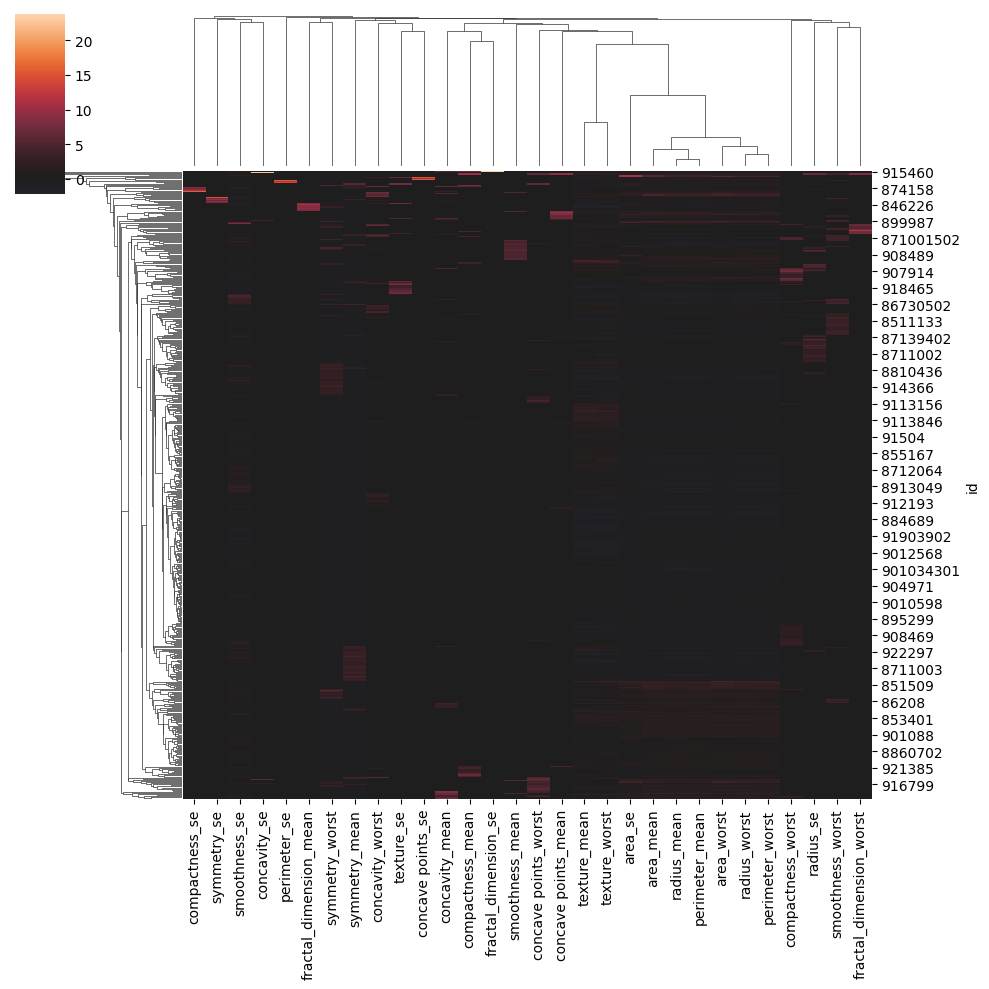

In [21]:
# create a seaborn clustermap of the standardized data frame
sns.clustermap(df_standardized.iloc[:, :-1], center=0)

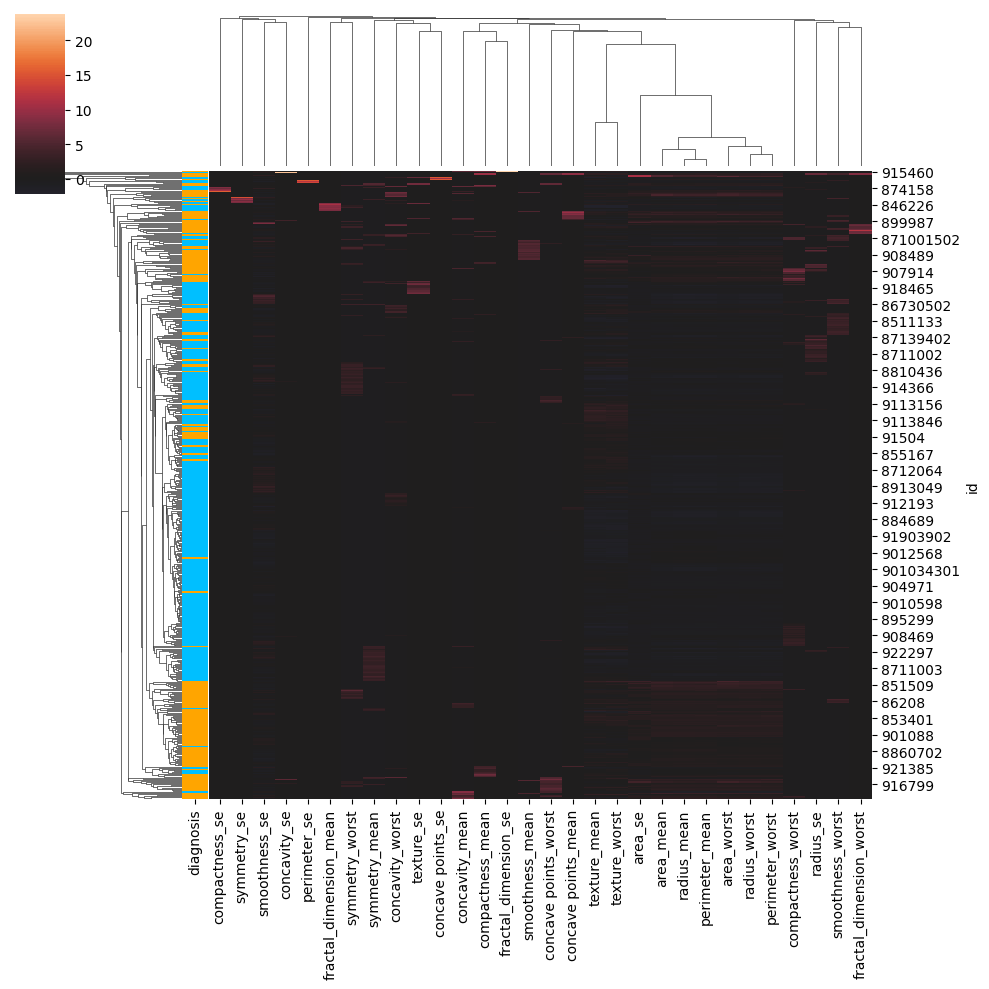

In [22]:
# try if you can add information about the diagnosis into the clustermap
# HINT: the row_colors argument might help

# setting up a color mapping from the diagnosis values to colors
color_mapping = {"B": "deepskyblue", "M": "orange"}
row_colors = df_standardized["diagnosis"].map(color_mapping)
# adding the colors into the clustermap
sns.clustermap(df_standardized.iloc[:, :-1], row_colors=row_colors, center=0)

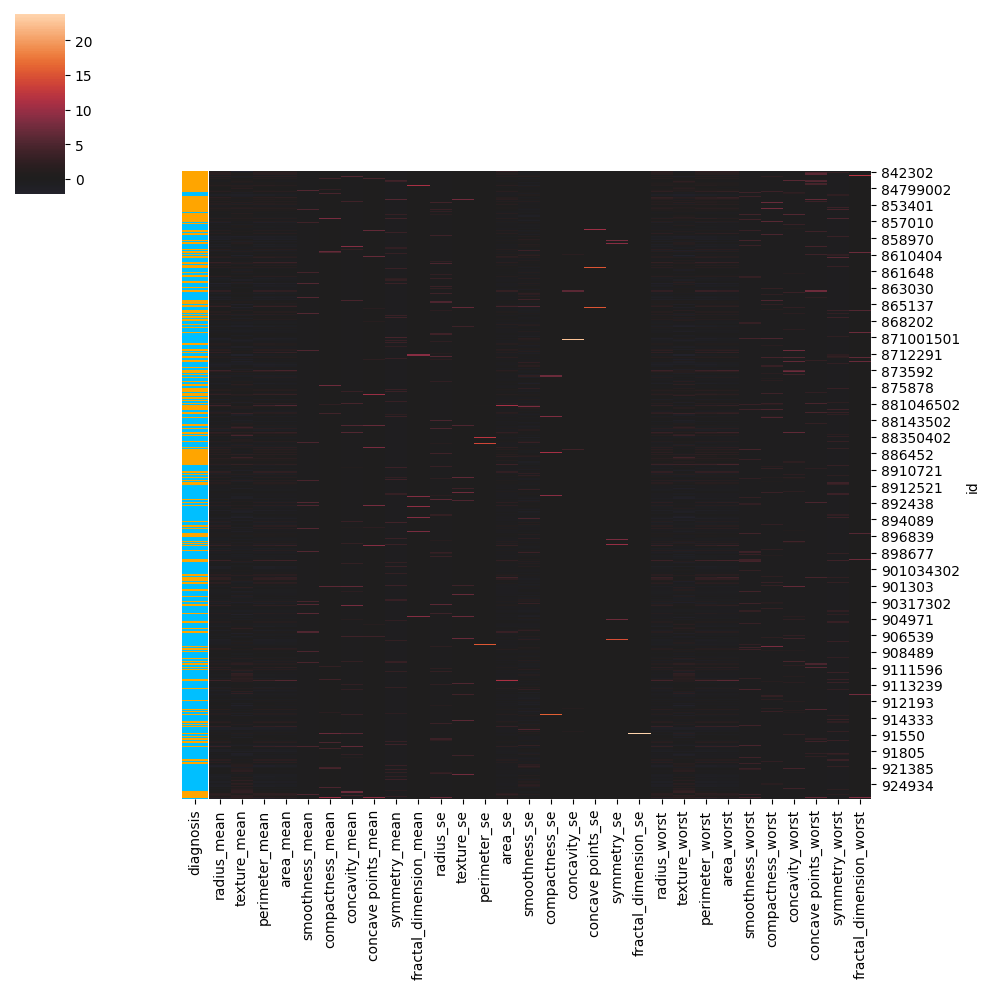

In [23]:
# just for fun, try to see what happens if you now set col_cluster and row_cluster to False
# compare the clustermap to the previous one
# did clustering help to reveal patterns?

# setting up a color mapping from the diagnosis values to colors
color_mapping = {"B": "deepskyblue", "M": "orange"}
row_colors = df_standardized["diagnosis"].map(color_mapping)
# adding the colors into the clustermap
sns.clustermap(df_standardized.iloc[:, :-1], row_colors=row_colors, 
               col_cluster=False, row_cluster=False, center=0)

## Principal Component Analysis (PCA)

Heatmaps are awesome, and they allow us to show a lot of information at once. However, they can be restrictive when looking at large amounts of data. Sometimes, it is better to use dimensionality reduction techniques.

PCA essentially takes our 30-dimensional data and projects it onto a 2-dimensional space while retaining the most variance. This enables us to plot each patients as a point in 2D space.

In [24]:
# importing PCA
from sklearn.decomposition import PCA

# apply PCA to our standardized (this is important! always center and scale before applying PCA)
# data frame. Store the results in a new data frame called pca_df. Only keep the first two
# principal components.
pca = PCA(n_components=2)
pca_df = pd.DataFrame(pca.fit_transform(df_standardized.iloc[:, :-1]), 
                      columns=["PC1", "PC2"], 
                      index=df_standardized.index)
pca_df.head()

PC1       PC2
id                          
842302    3.648571 -3.016494
842517    4.515822 -1.876280
84300903  4.251734 -0.726839
84348301 -1.118112  1.976826
84358402  3.534786 -1.915335

<Axes: xlabel='PC1', ylabel='PC2'>

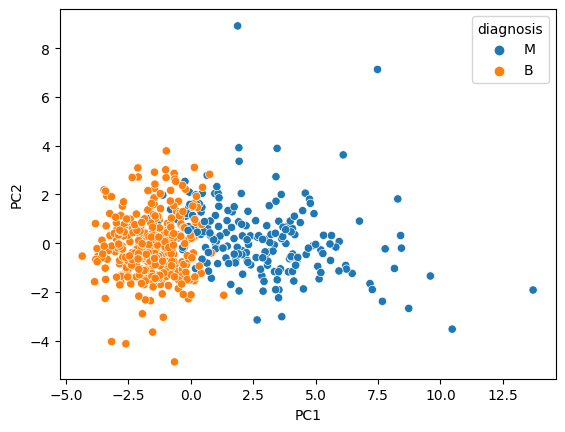

In [25]:
# add the diagnosis as a new column to the pca_df.
# create a scatterplot using seaborn with PC1 on the x axis, PC2 on the y axis, and 
# the diagnosis as the color

pca_df["diagnosis"] = df_standardized["diagnosis"]
sns.scatterplot(pca_df, x="PC1", y="PC2", hue="diagnosis")

Text(0, 0.5, 'PC2 (EV=5.95%)')

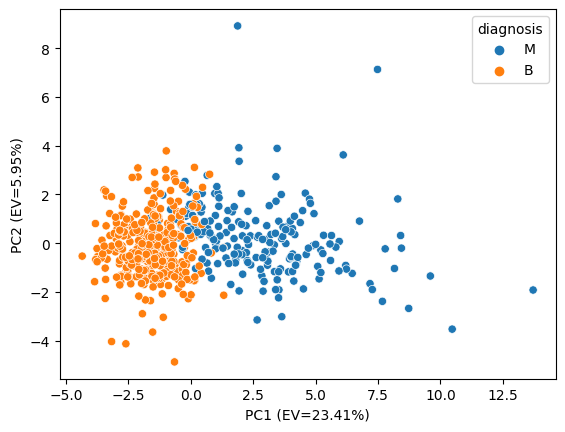

In [26]:
# you can access the explained variance ratio (EV) of each principal component
# (if you don't know how, I recommend asking ChatGPT. Remember to provide your code.)
# access the explained variance ratio and change the axis labels 
# for example, instead of PC1, the x axis should say PC1 (EV=21%)

# getting the explained variance ratio
ev = pca.explained_variance_ratio_
sns.scatterplot(pca_df, x=f"PC1", y="PC2", hue="diagnosis")
plt.xlabel(f"PC1 (EV={100*ev[0]:.2f}%)")
plt.ylabel(f"PC2 (EV={100*ev[1]:.2f}%)")

## UMAP

PCA is cool and interpretable, but there are more advanced dimensionality reduction methods. One of these is UMAP. The details of this go beyond the scope of this practical, for you it is enough to know that you can use UMAP to project from high-dimensional spaces into 2D space. One important note: UMAP does not preserve distances faithfully, so **never cluster on UMAP space!** Only use UMAP for visualization purposes.

In [27]:
import umap

# run umap to project our raw data onto 2D space
# store the result in a data frame called umap_df_raw
# add the diagnosis column into the resulting data frame

# Create a UMAP reducer with the desired number of components (e.g., 2)
reducer = umap.UMAP(n_components=2)
# Fit and transform the data using UMAP
umap_df_raw = pd.DataFrame(reducer.fit_transform(df.iloc[:, 1:]), columns=["UMAP1", "UMAP2"], index=df.index)
umap_df_raw["diagnosis"] = df["diagnosis"]
umap_df_raw

UMAP1      UMAP2 diagnosis
id                                      
842302    12.179415  10.755548         M
842517    12.567621  11.188445         M
84300903  11.296127  10.862484         M
84348301  -0.367728   7.882200         M
84358402  11.026014  11.006032         M
...             ...        ...       ...
926424    12.708110  11.056674         M
926682    11.515971  10.995041         M
926954     7.526555  11.535790         M
927241    11.755662  11.098610         M
92751     -1.264544   1.349720         B

[569 rows x 3 columns]

<Axes: xlabel='UMAP1', ylabel='UMAP2'>

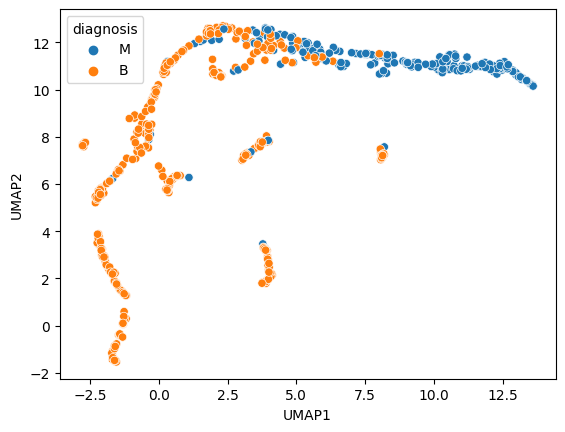

In [28]:
# plot a scatter plot with UMAP1 and UMAP2 on the x and y axis and the diagnosis as hue
sns.scatterplot(umap_df_raw, x="UMAP1", y="UMAP2", hue="diagnosis")

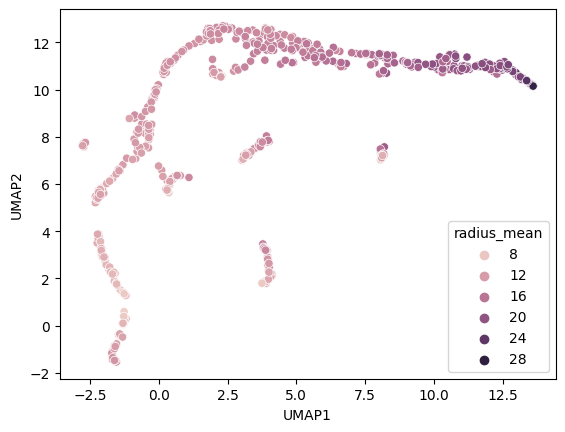

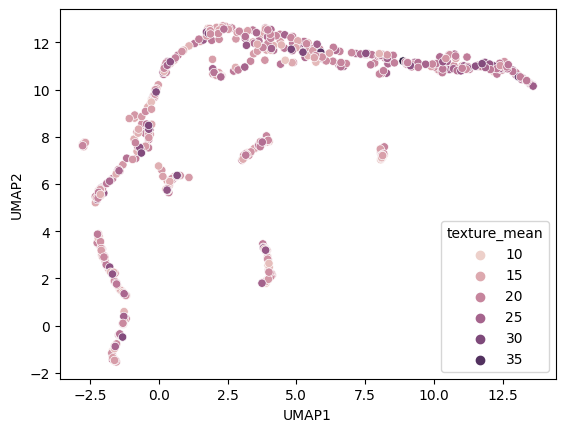

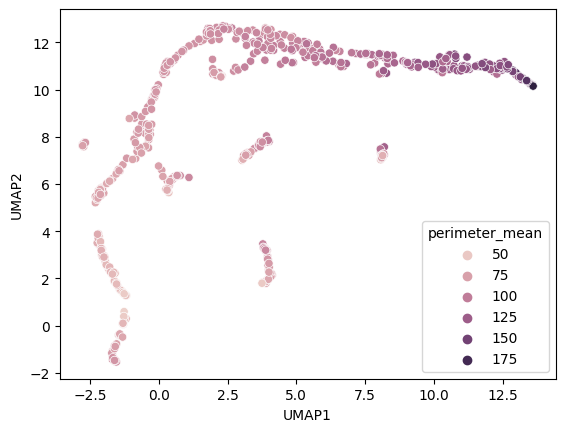

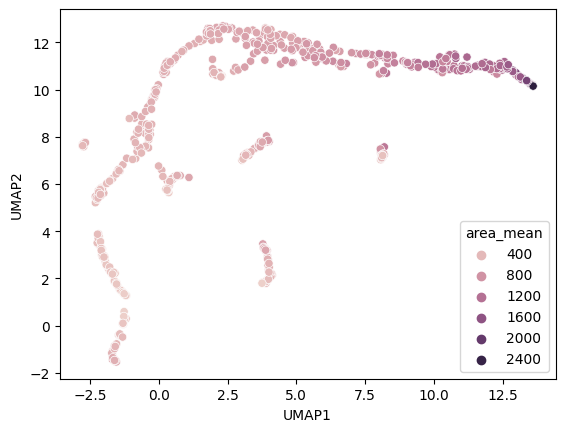

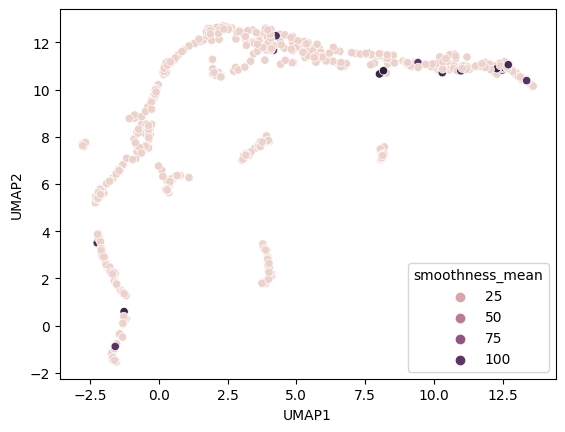

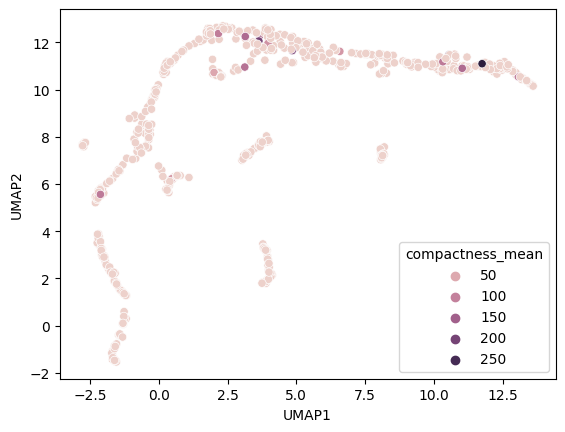

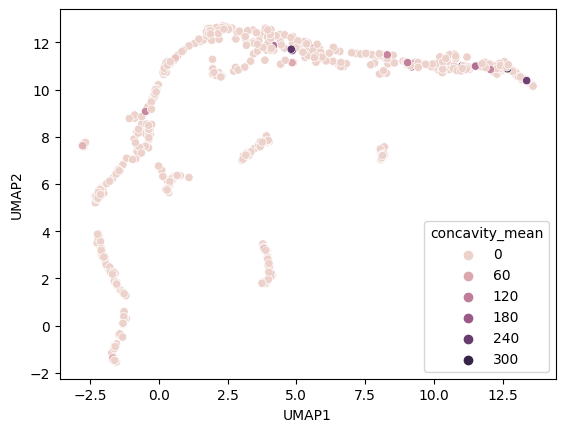

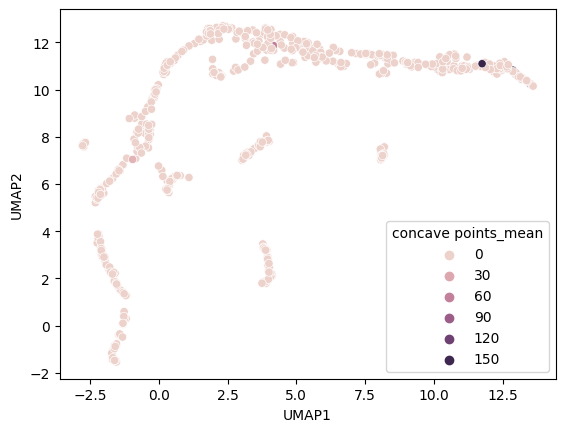

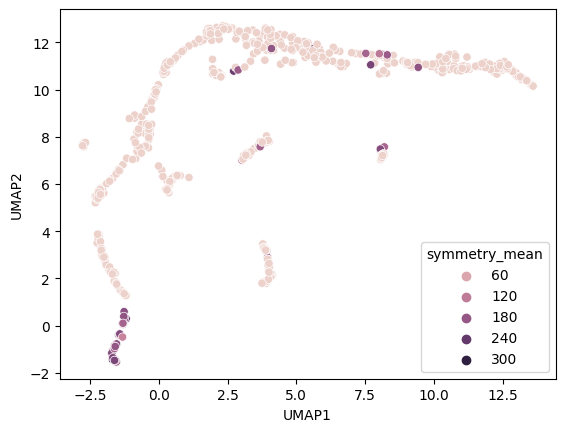

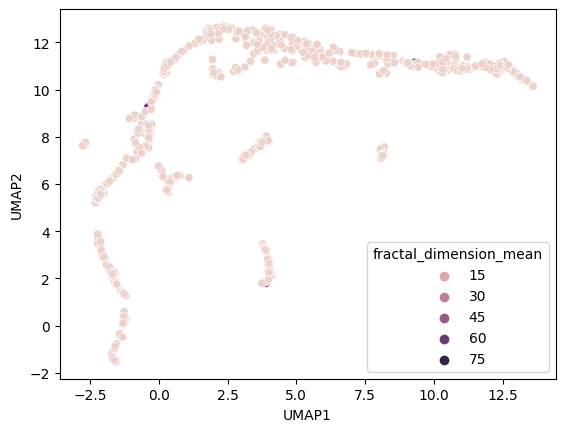

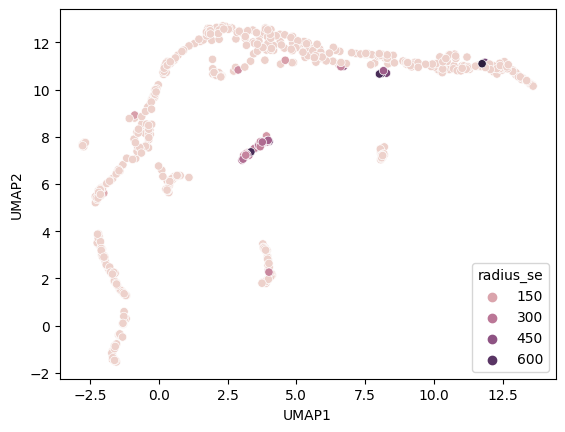

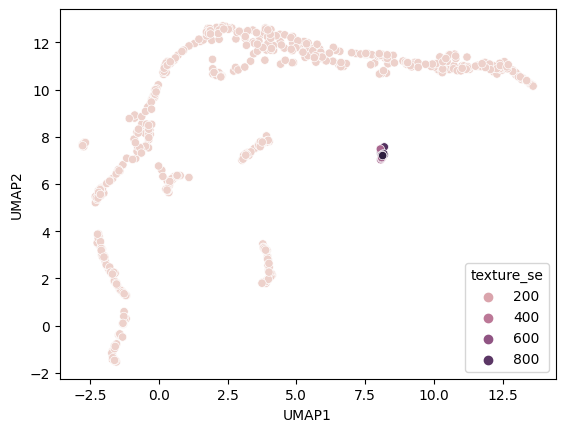

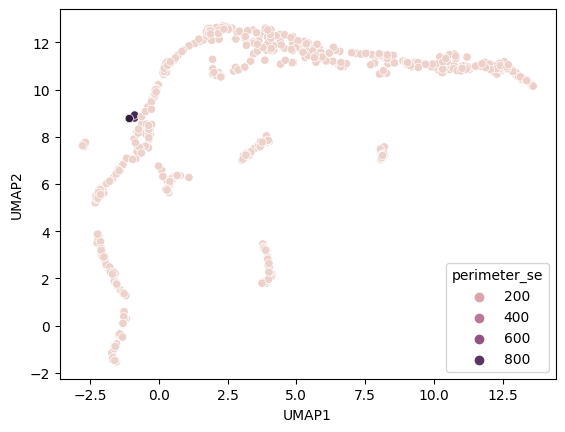

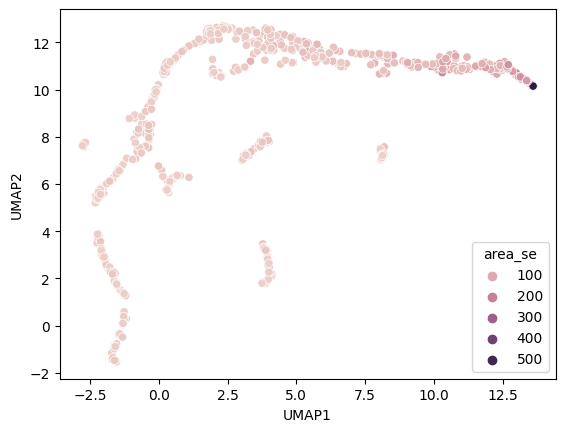

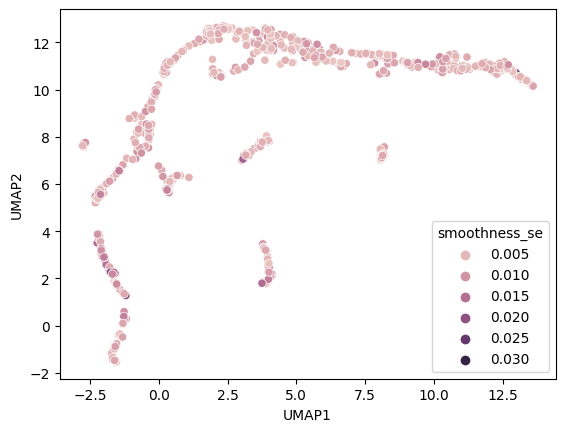

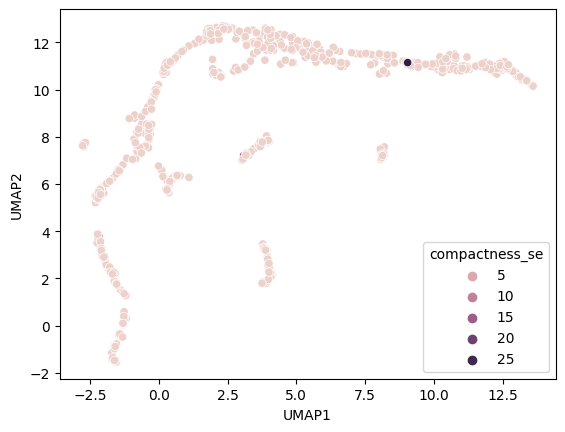

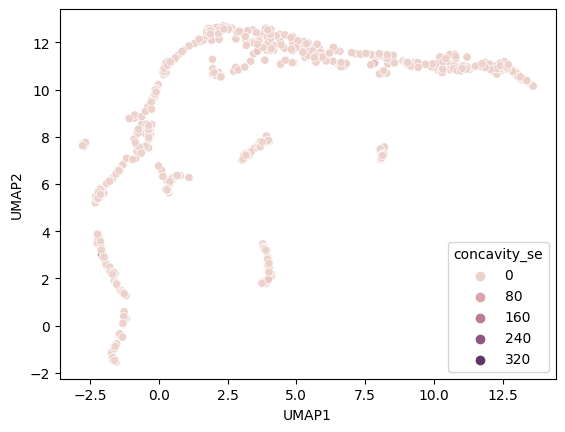

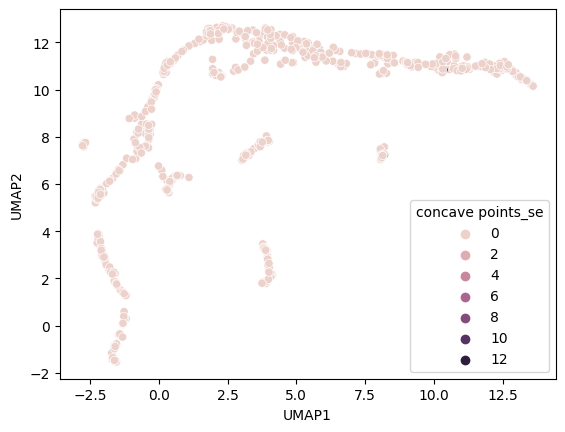

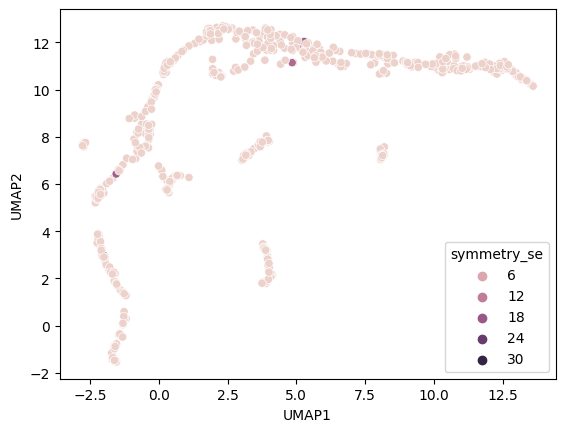

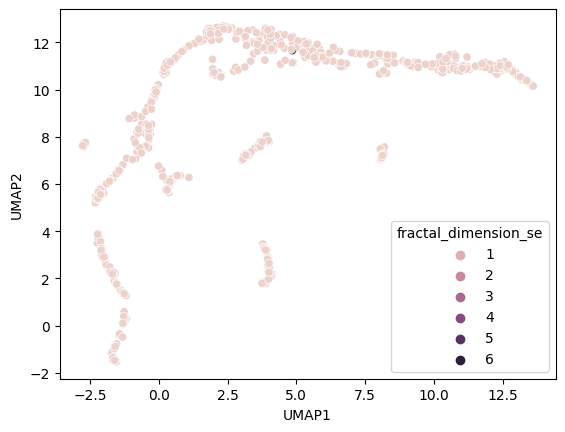

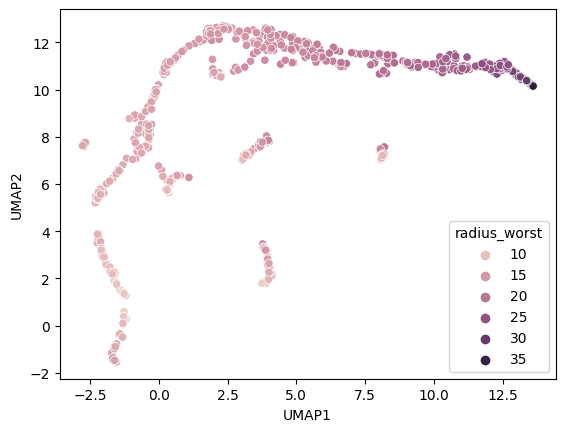

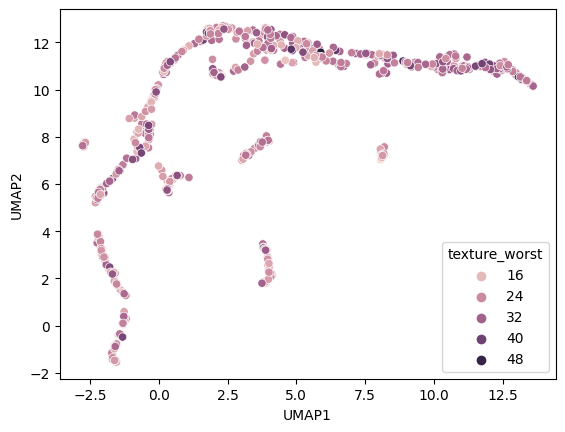

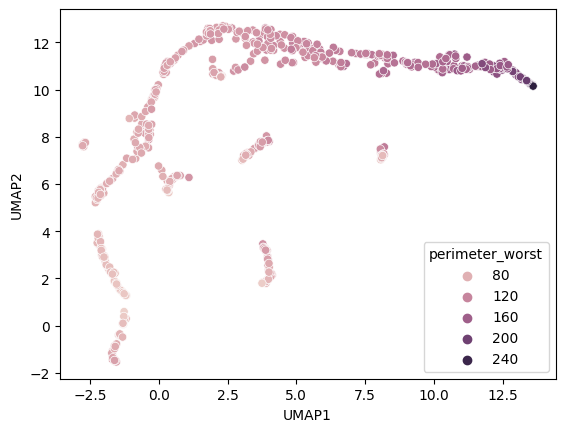

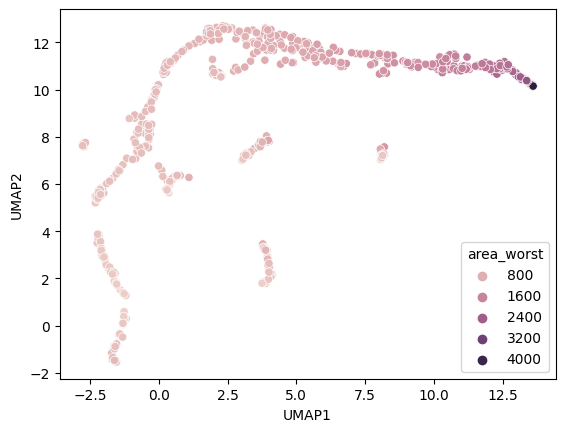

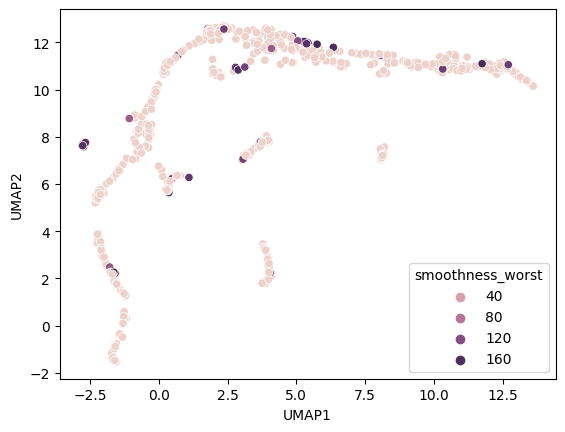

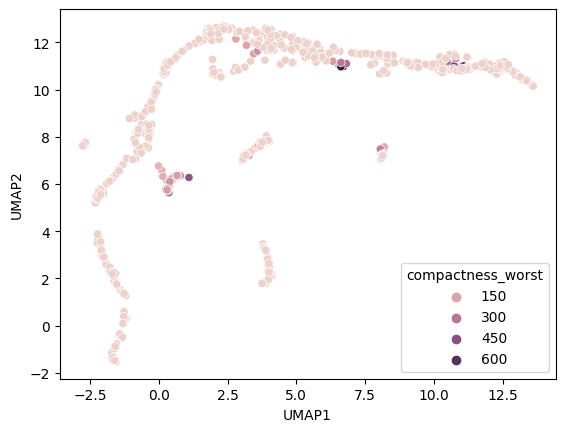

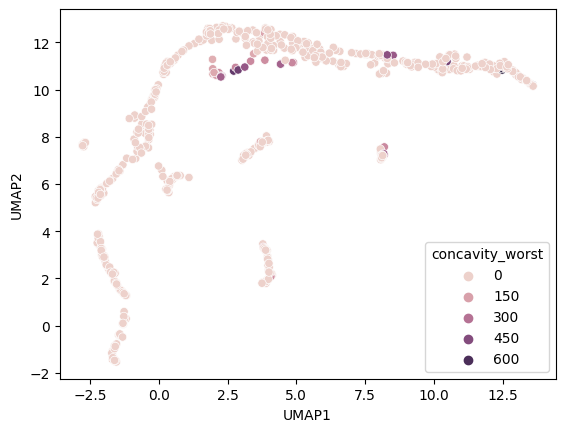

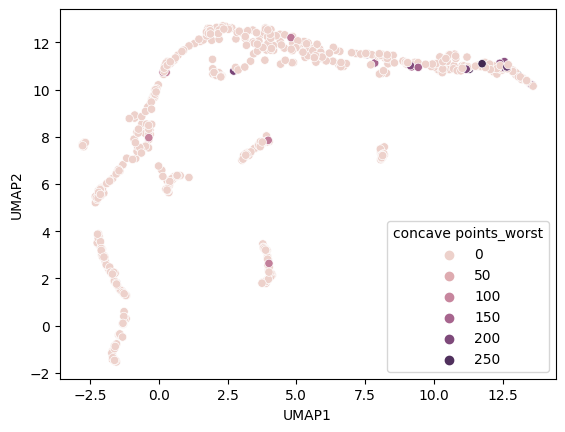

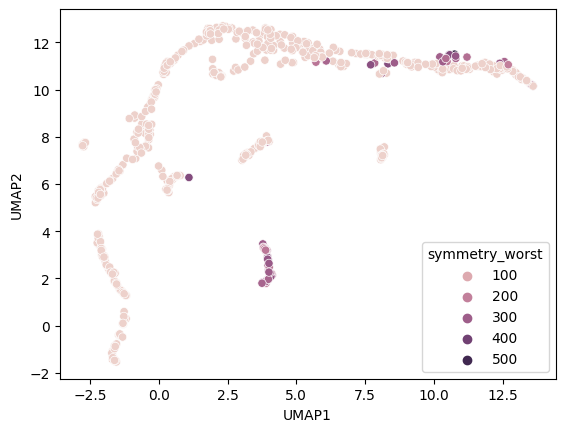

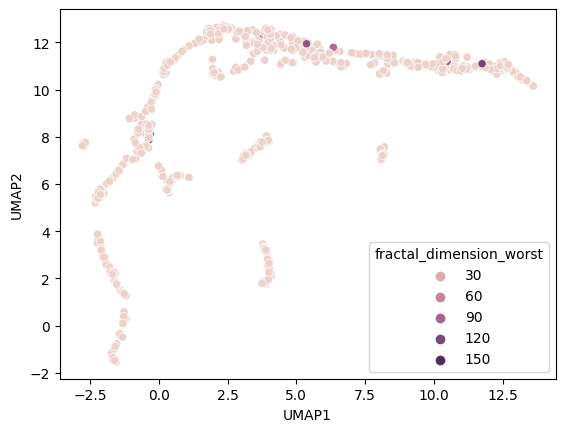

In [31]:
umap_df_with_extra_infos = pd.concat([umap_df_raw, df], axis=1)
for col in umap_df_with_extra_infos.columns[4:]:
    sns.scatterplot(umap_df_with_extra_infos, x="UMAP1", y="UMAP2", hue=col)
    plt.show()

<Axes: xlabel='UMAP1', ylabel='UMAP2'>

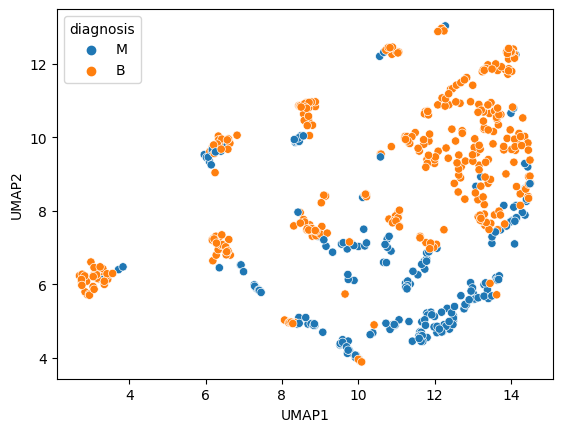

In [32]:
# now try applying UMAP on the standardized data
# do you see any differences? Do you think standardization is necessary for UMAP?

# Create a UMAP reducer with the desired number of components (e.g., 2)
reducer = umap.UMAP(n_components=2)
# Fit and transform the data using UMAP
umap_df_standardized = pd.DataFrame(reducer.fit_transform(df_standardized.iloc[:, :-1]), columns=["UMAP1", "UMAP2"], index=df.index)
umap_df_standardized["diagnosis"] = df_standardized["diagnosis"]

# plot the result
sns.scatterplot(umap_df_standardized, x="UMAP1", y="UMAP2", hue="diagnosis")

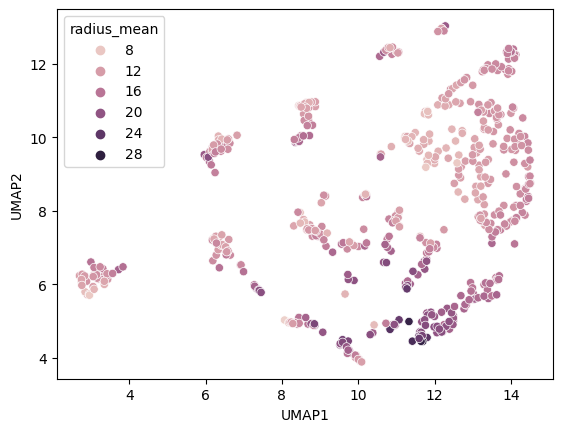

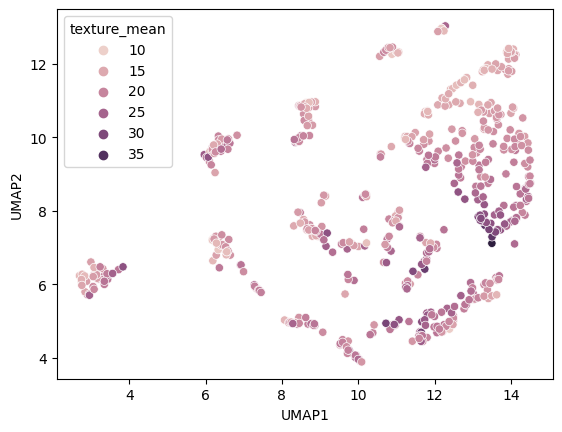

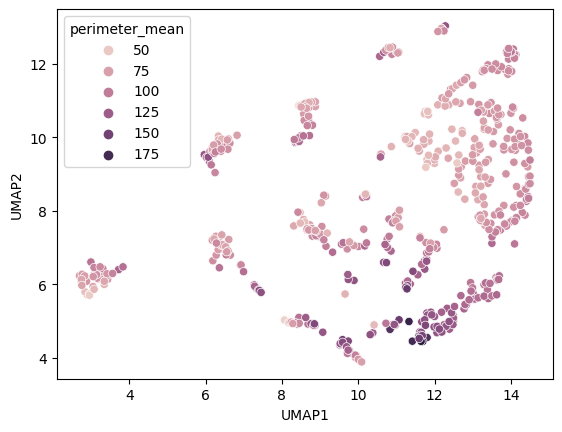

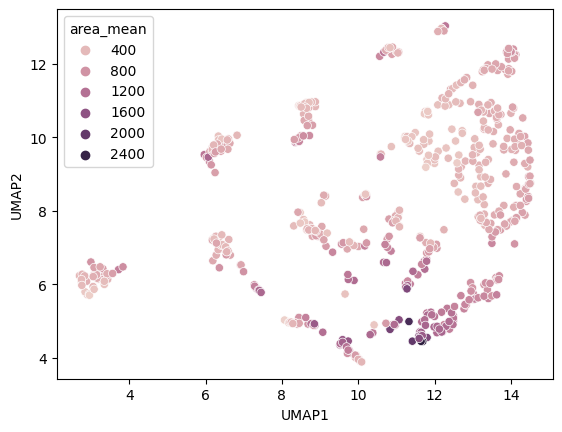

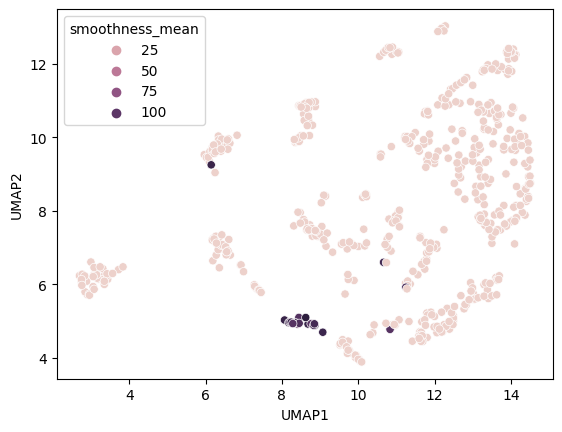

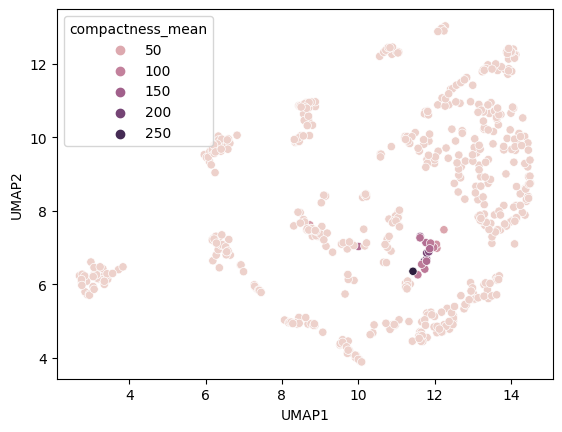

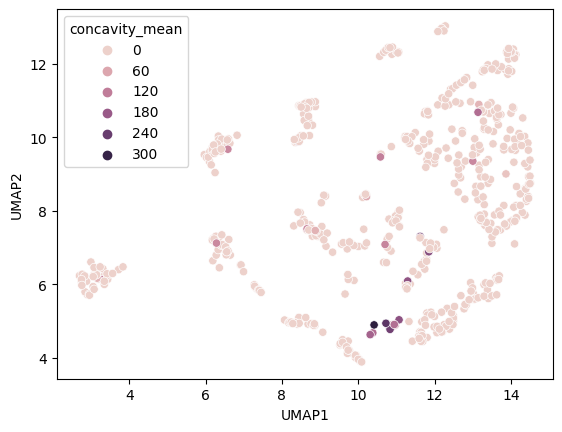

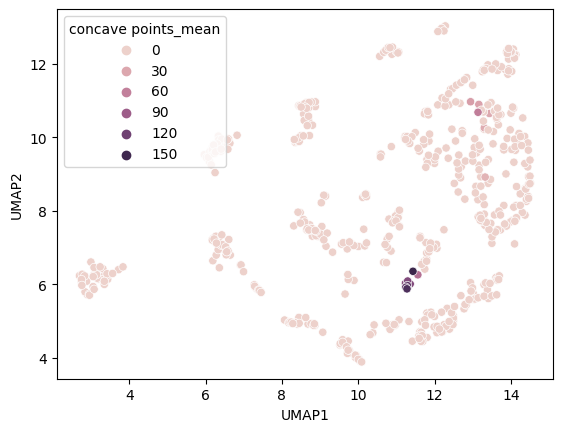

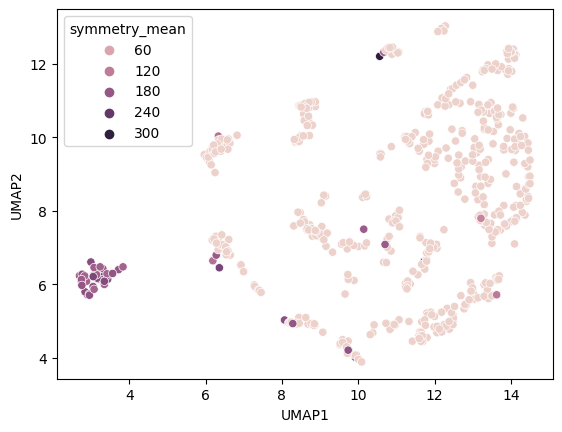

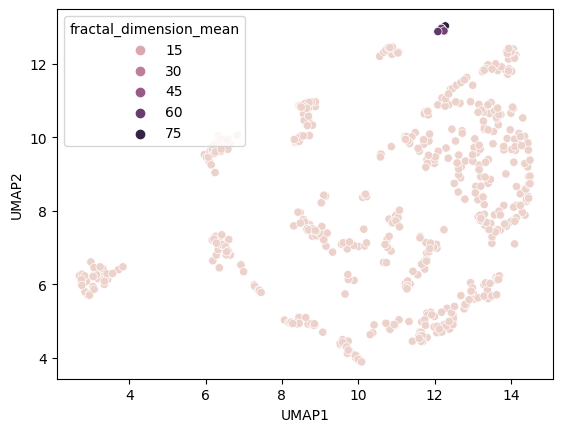

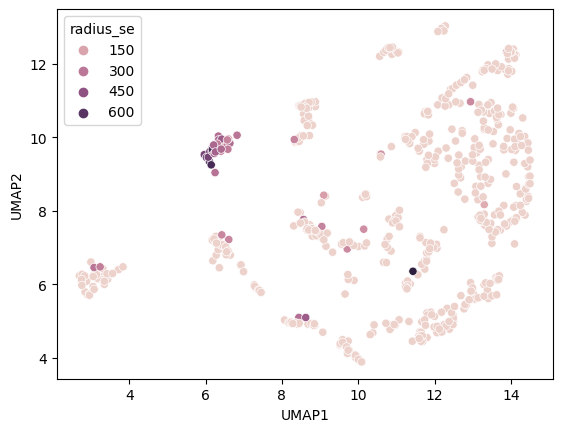

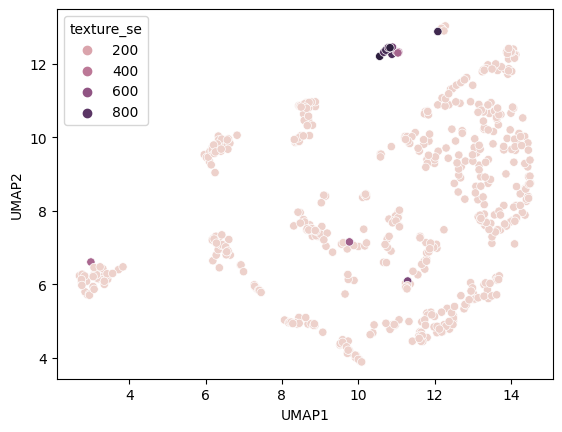

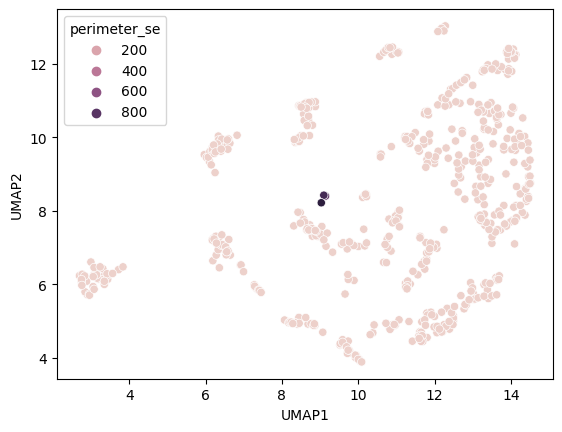

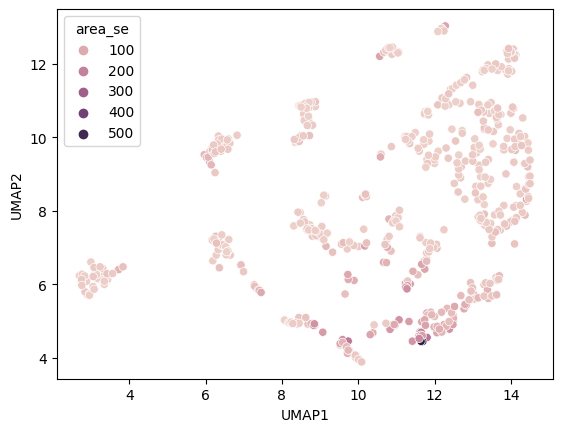

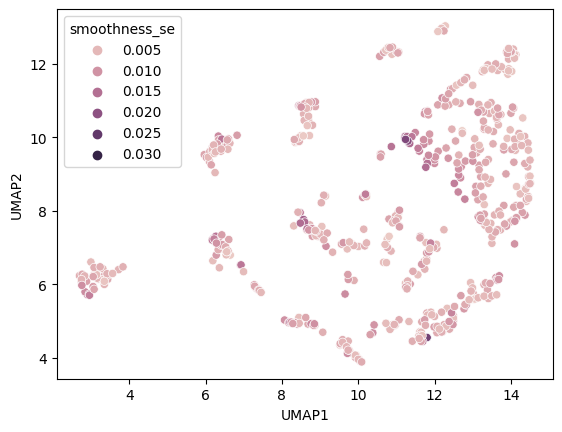

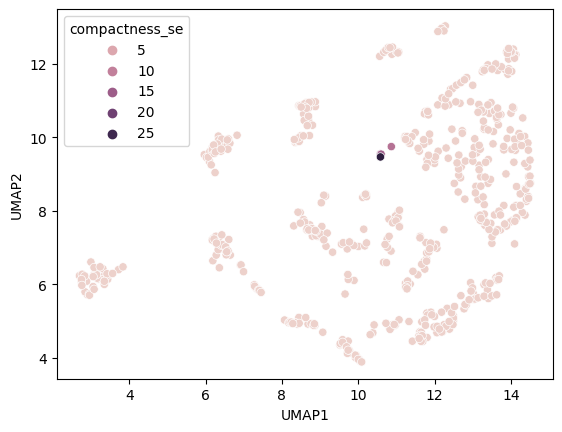

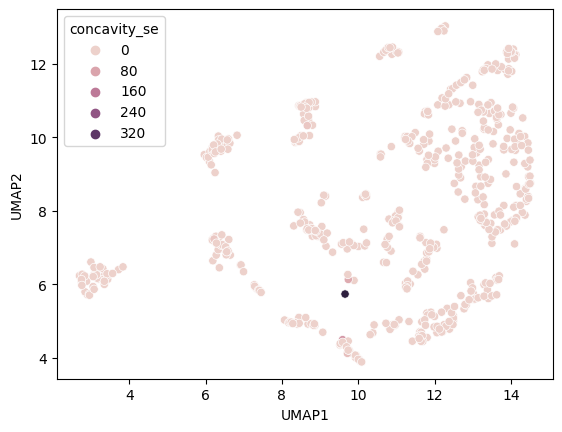

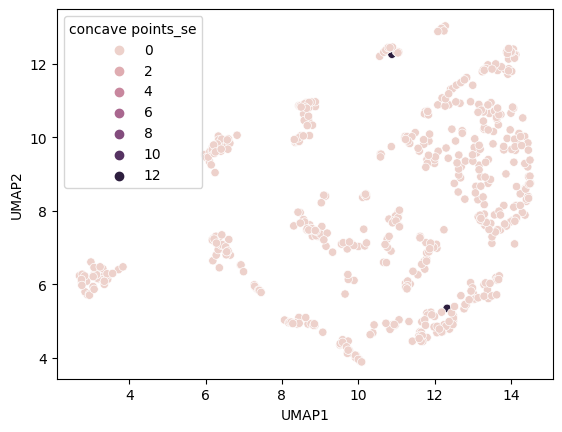

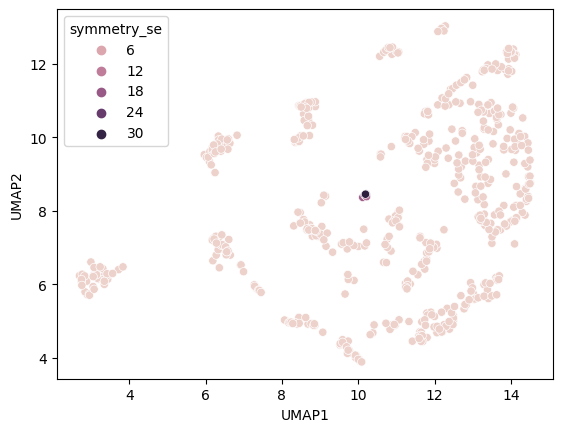

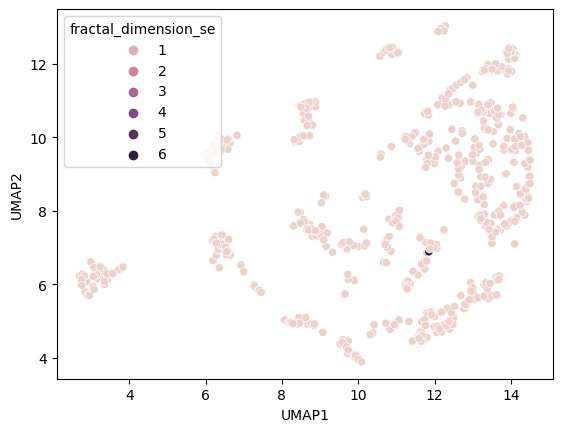

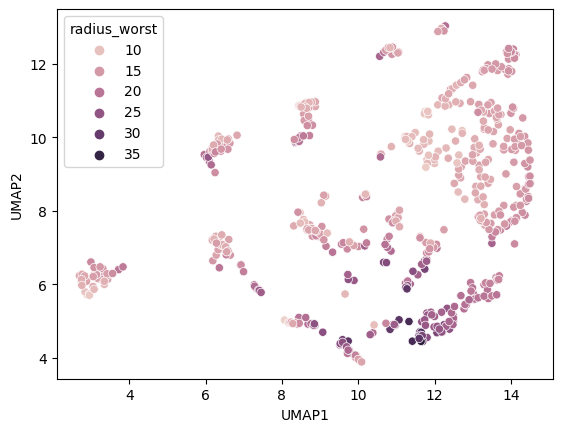

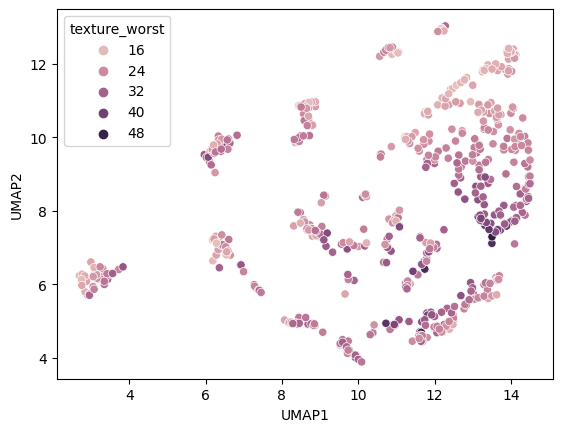

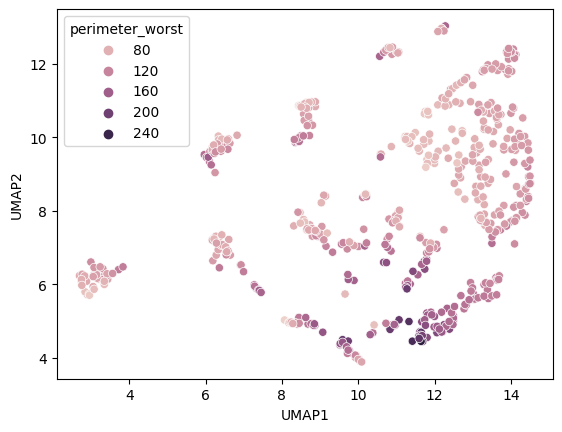

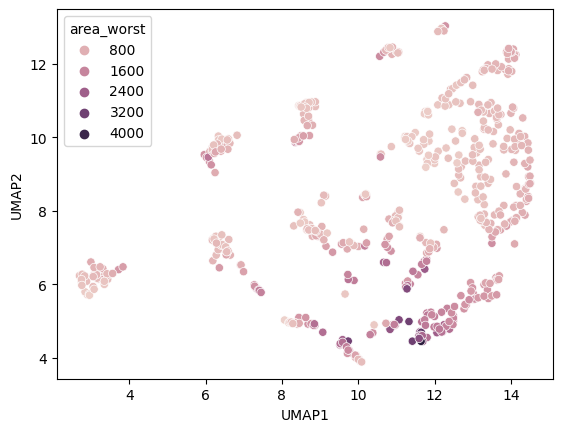

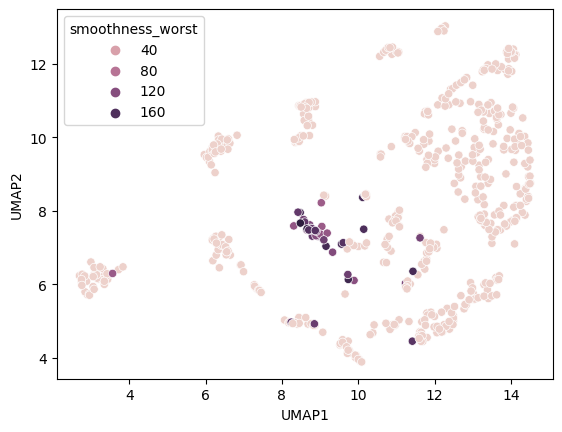

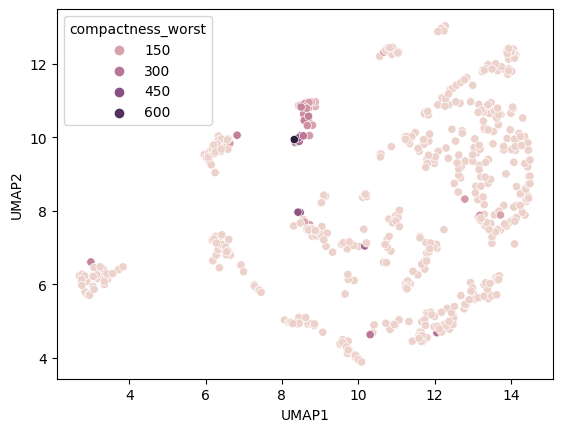

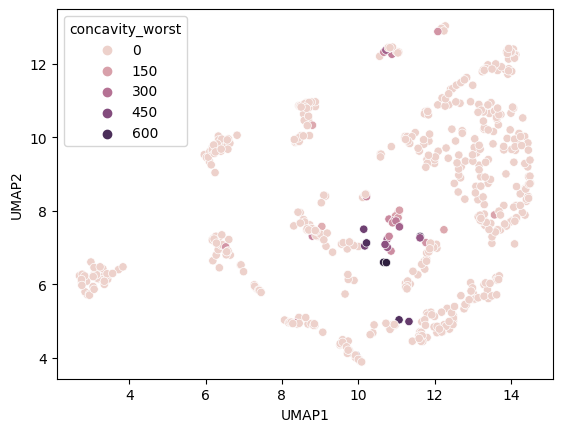

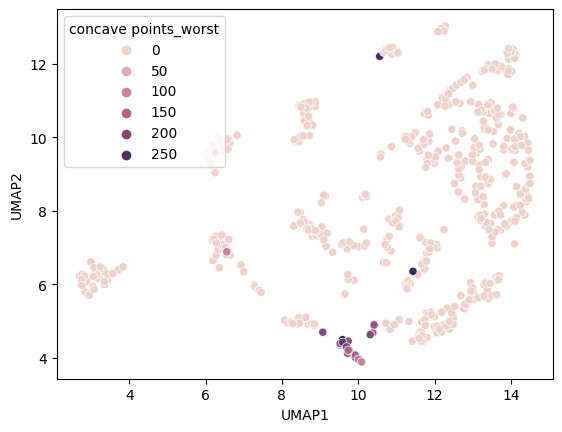

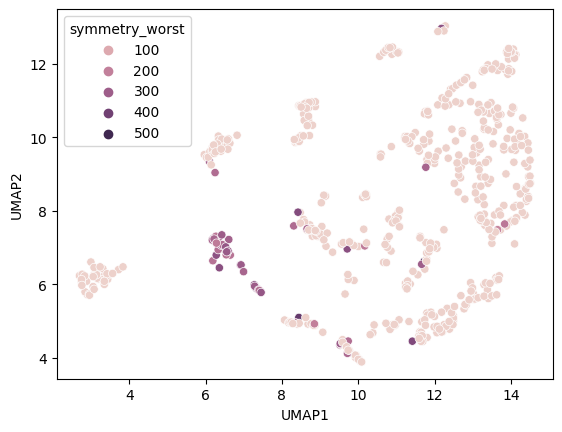

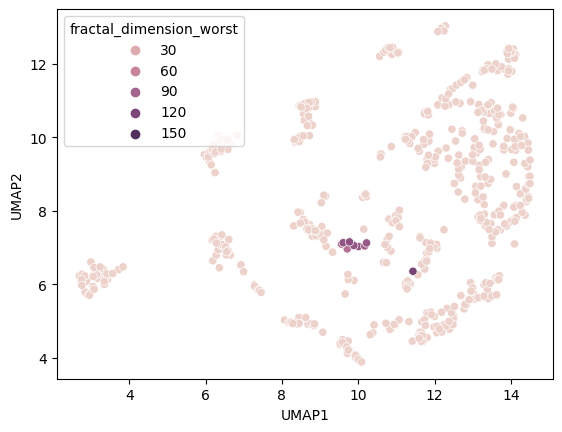

In [34]:
umap_df_with_extra_infos = pd.concat([umap_df_standardized, df], axis=1)
for col in umap_df_with_extra_infos.columns[4:]:
    sns.scatterplot(umap_df_with_extra_infos, x="UMAP1", y="UMAP2", hue=col)
    plt.show()

## Catplots
One last option of looking at high dimensional data is to look at feature distributions. You already looked at histograms for single features before, but what if we could plot a bunch of feature distributions in a single plot? This is where catplots (categorical plots) come in. You are probably familiar with bar- or boxplots, but there are also other types, such as violinplots or swarmplots. You can find more information on these types in the [seaborn documentation](https://seaborn.pydata.org/generated/seaborn.catplot.html).

The reason why we are only now looking at these plots is that creating them requires some reshaping of the data frame. We will hence use this section to look into pandas a bit more, and then explore some ways of plotting the data.

Let's start by reshaping the data frame. Our goal is to go from a data frame with the columns [feature1, feature2, feature2, ...] to a data frame with columns [feature, value]. We can do this by using the `pd.melt()` function.

In [30]:
# select only numerical features from the data frame
# melt the data frame to get a new data frame containing one column for the features and one for the values
df_melted = pd.melt(df.iloc[:, 1:])
df_melted.head()

variable  value
0  radius_mean  17.99
1  radius_mean  20.57
2  radius_mean  19.69
3  radius_mean  11.42
4  radius_mean  20.29

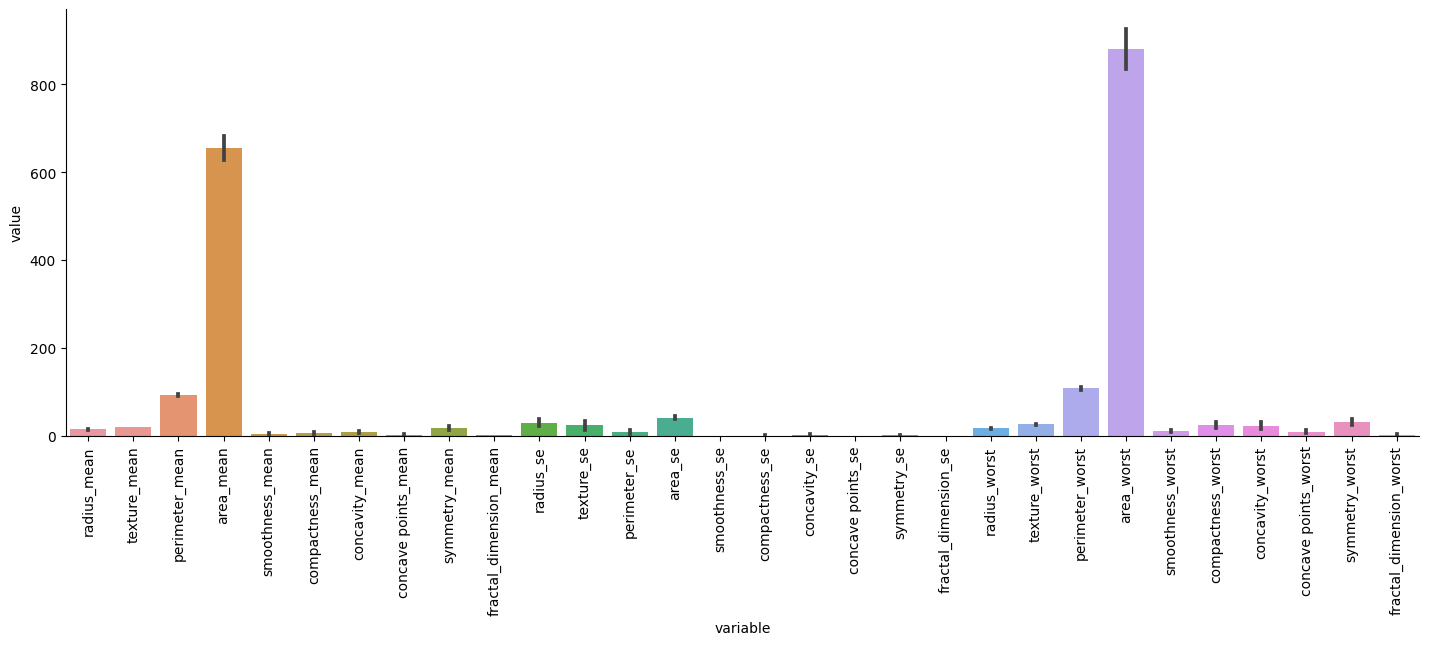

In [31]:
# create a barplot of all the features using seaborn's catplot method
# try using the "aspect" parameter to change the size of the figure
sns.catplot(df_melted, x="variable", y="value", kind="bar", aspect=3)
plt.xticks(rotation=90)
plt.show()

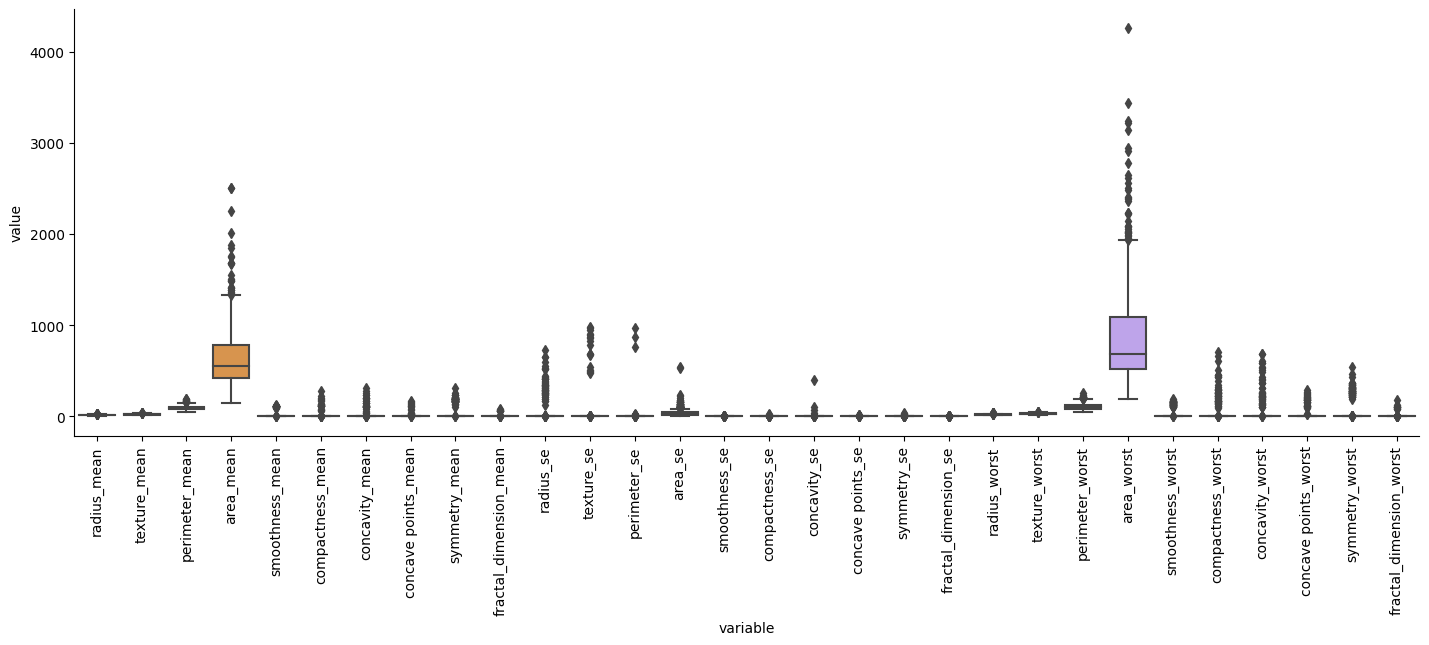

In [32]:
# now do the same thing, but with a boxplot instead of a barplot
# do you see how the boxplot could be misleading, and how showing more of the data gives us a better understanding?
sns.catplot(df_melted, x="variable", y="value", kind="box", aspect=3)
plt.xticks(rotation=90)
plt.show()

/home/meyerben/meyerben/.conda/envs/scot_env/lib/python3.8/site-packages/seaborn/categorical.py:3544: UserWarning: 6.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


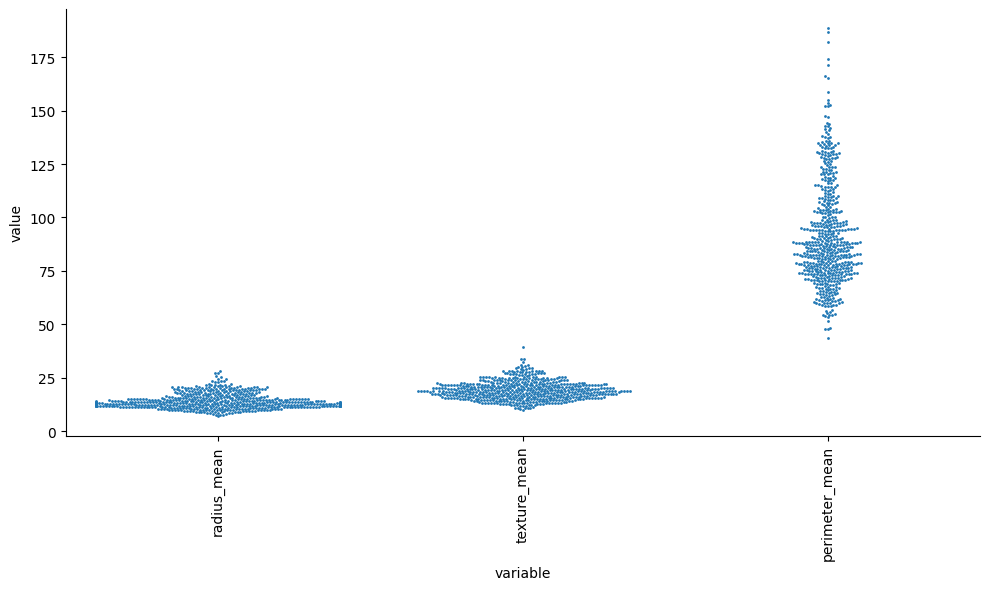

In [33]:
# select three features from the data frame
# create a swarmplot for the resulting subselected data frame
selected_features = ["radius_mean", "texture_mean", "perimeter_mean"]
df_melted_selected = df_melted[df_melted["variable"].isin(selected_features)]

sns.catplot(data=df_melted_selected, x="variable", y="value", kind="swarm", aspect=2, size=2)
plt.xticks(rotation=90)
plt.show()

## Advanced Plotting

Amazing work! Now you are set to begin your journey as a data scientist!
Just before wrapping up, here are some quick tips on how to create nicer plots. It is often not too much of an effort to prettify your plots, but it makes it look substantially more professional. It can also help you get a better grasp of your data. 

## Create Meaningful Color Scales

When plotting a heatmap, you typically have two types of color scales: **continuous** or **divergent**. Continuous color scales go from one color to another, for example white to red. Divergent color schemes typically consist of three colors, e. g. blue, black and red.
When your color scale has a meaningful center point (e. g. because you centered your data), use a divergent scale. Otherwise, a continuous one might be more appropriate.

You can find possible color palettes [here](https://seaborn.pydata.org/tutorial/color_palettes.html).

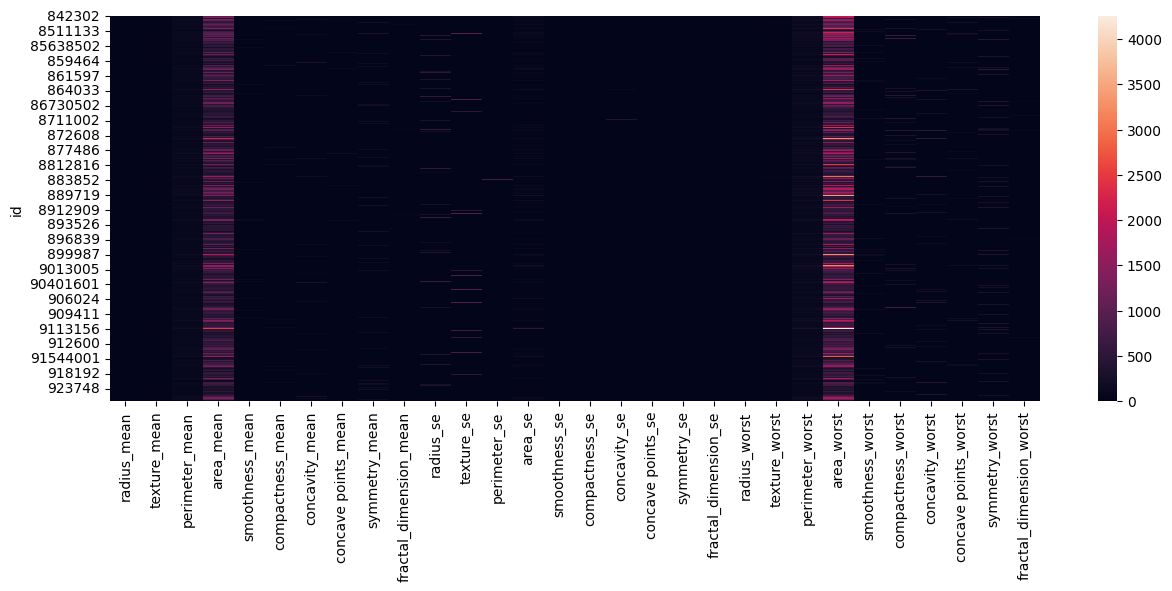

In [34]:
# example: in this case, a continuous color scale makes more sense, because our data goes from 0 to some number
plt.figure(figsize=(15, 5))
sns.heatmap(df.iloc[:, 1:])
plt.show()

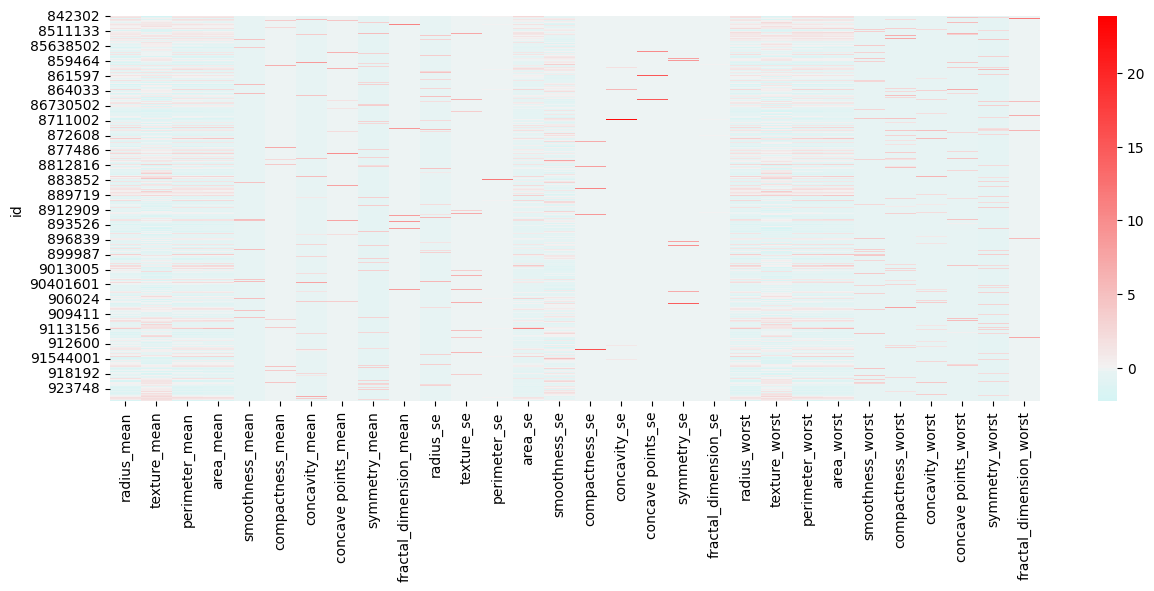

In [35]:
# example: in this case, a divergent color scale is more sensible,
# because we go from negative over neutral (0) to positive
# we can even set a custom palette
palette = sns.diverging_palette(220, 20, 1000, as_cmap=True)
plt.figure(figsize=(15, 5))
sns.heatmap(df_standardized.iloc[:, :-1], center=0, cmap=palette)
plt.show()

## Nicer Scatterplots in Seaborn

While seaborn plots already look decent out of the box, there are some things you can tweak to make them look even better.

For example, removing the top and right axis and playing around with colors and font sizes can make a massive difference. You can also see what changing the size of your points does. Here is the same UMAP plot from before, but prettified.

If you want to create a custom color scheme, [Coolors](https://coolors.co) has some good inspiration.

In [36]:
# set custom parameters for seaborn
# if you put this at the top of your notebook, all of your plots will inherit these settings
custom_params = {"axes.spines.right": False, "axes.spines.top": False, "figure.dpi": 150}
sns.set_theme(style="ticks", rc=custom_params)

<Axes: xlabel='UMAP1', ylabel='UMAP2'>

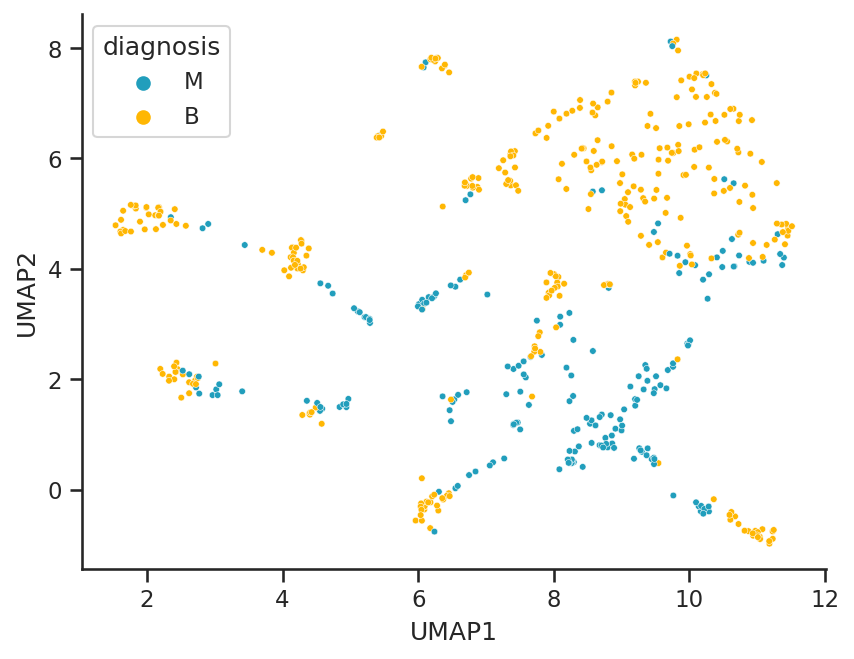

In [37]:
# custom colors
# this is simply a dictionary that maps our possible diagnoses to the hex code of a color
color_mapping = {"M": "#219ebc", "B": "#ffb703"}
sns.scatterplot(umap_df_standardized, x="UMAP1", y="UMAP2", 
                hue="diagnosis", palette=color_mapping, s=10)